# Sprint 2 - Molelo de Regressão para Prever o Preço de Carros


## Descrição das Variáveis
* **manufacturer**: nome do fabricante.
* **model**: modelo do carro.
* **year**: ano de produção.
* **mileage**: número de milhas percorridas.
* **engine**: descrição do motor.
* **transmission**: tipo de transmissão.
* **drivetrain**: tipo de tração.
* **fuel_type**: tipo de combustível.
* **mpg**: milhas por galão.
* **exterior_color**: cor externa.
* **interior_color**: cor interna.
* **accidents_or_damage**: Envolvimento em acidentes (1 = sim / 0 = não).
* **one_owner**: Único dono (1 = sim / 0 = não).
* **personal_use_only**: Apenas uso pessoal (1 = sim / 0 = não).
* **seller_name**: Nome do vendedor.
* **seller_rating**: Avaliação do vendedor.
* **driver_rating**: Avaliação do carro pelos motoristas.
* **driver_reviews_num**: Número de avaliações pelos motoristas.
* **price_drop**: Redução do preço em relação ao preço inicial.
* **price**: Preço do carro.

In [1367]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import re

np.random.seed(1)

In [1368]:
df = pd.read_csv('cars.csv')

In [1369]:
# colhendo a amostra de 25% sobre o dataframe
cars_df = df.sample(frac=0.25, random_state=1)

# 1. Análise Exploratória dos Dados – pré-limpeza

In [1370]:
cars_df.head()

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
456056,Land Rover,Range Rover Sport HSE Dynamic,2018,33585.00,V6,Automatic,Four-wheel Drive,Gasoline,17-23,Santorini Black,Ebony,0.00,1.00,0.00,Schaumburg Ford,4.10,4.00,45.00,500.00,53950.00
563956,Nissan,Armada SL,2017,63009.00,5.6L V8 32V GDI DOHC,7-Speed Automatic,Rear-wheel Drive,Gasoline,14-19,Black,Almond,0.00,0.00,1.00,World Auto Inc.,2.30,4.70,78.00,NaN,27885.00
724184,Toyota,Tundra 1794,2018,51316.00,"I-FORCE 5.7L V-8 DOHC, VVT-i variable valve co...",Automatic,Four-wheel Drive,Gasoline,13-17,SILVER,Brown/Black,0.00,NaN,1.00,CAL Cars,4.40,4.80,199.00,1000.00,46995.00
706657,Toyota,Avalon XLE,2015,89444.00,3.5L V6 24V MPFI DOHC,6-Speed Automatic,Front-wheel Drive,Gasoline,21-31,Cosmic Gray Mica,Light Gray,0.00,1.00,1.00,Scanlon Lexus,4.70,4.70,74.00,482.00,17987.00
551197,Mercedes-Benz,GLS 450 4MATIC,2023,2191.00,3.0L I6 24V GDI DOHC Turbo,9-Speed Automatic,All-wheel Drive,Gasoline,NaN,2191,Tartufo Brown,0.00,1.00,1.00,Lupient Buick GMC,4.50,NaN,0.00,5969.00,96648.00


In [1371]:
cars_df.tail()

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
340527,Hyundai,Elantra SE,2017,52900.00,"Nu 2L I-4 DOHC, D-CVVT variable valve control,...",6-Speed Automatic,Front-wheel Drive,Gasoline,29-38,Lakeside Blue,Gray,0.00,0.00,0.00,Bommarito Nissan Hazelwood,4.80,4.70,640.00,NaN,16995.00
618501,RAM,ProMaster 1500 Low Roof,2015,45195.00,3.0L I4 16V DDI DOHC Turbo Diesel,Automatic,Front-wheel Drive,Diesel,NaN,Bright White Clearcoat,Gray,0.00,0.00,1.00,Woody's Dodge Jeep Chrysler RAM,4.60,4.10,5.00,NaN,54870.00
673837,Toyota,Highlander,2013,160000.00,3.5L V6 24V MPFI DOHC,5-Speed Automatic,All-wheel Drive,Gasoline,17-22,White,Beige,0.00,1.00,1.00,Trade Guru,3.40,4.70,140.00,NaN,13991.00
291906,GMC,Yukon XL Denali,2016,102462.00,6.2L V8 16V GDI OHV,8-Speed Automatic,Rear-wheel Drive,Gasoline,15-22,Onyx Black,Jet Black,0.00,0.00,1.00,Murray Ford Superstore,4.80,4.70,26.00,213.00,32777.00
559392,Nissan,Frontier SV,2021,18568.00,3.8L V6 24V GDI DOHC,9-Speed Automatic,Rear-wheel Drive,Gasoline,18-24,Arctic Blue Metallic,Wheat,0.00,1.00,1.00,EchoPark Automotive Raleigh,4.90,4.50,9.00,1370.00,28319.00


In [1372]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190523 entries, 456056 to 559392
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   manufacturer         190523 non-null  object 
 1   model                190523 non-null  object 
 2   year                 190523 non-null  int64  
 3   mileage              190403 non-null  float64
 4   engine               186724 non-null  object 
 5   transmission         188036 non-null  object 
 6   drivetrain           185161 non-null  object 
 7   fuel_type            184720 non-null  object 
 8   mpg                  154790 non-null  object 
 9   exterior_color       188314 non-null  object 
 10  interior_color       176409 non-null  object 
 11  accidents_or_damage  184474 non-null  float64
 12  one_owner            182675 non-null  float64
 13  personal_use_only    184325 non-null  float64
 14  seller_name          188306 non-null  object 
 15  seller_rating    

Podemos notar que há bastante dados faltantes no dataset.

In [1373]:
pd.options.display.float_format = '{:.2f}'.format
cars_df.describe()

,year,mileage,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price
count,190523.00,190403.00,184474.00,182675.00,184325.00,137082.00,182603.00,190523.00,102644.00,190523.00
mean,2017.81,55719.12,0.23,0.56,0.66,4.16,4.62,89.43,1009.27,43085.81
std,5.04,43625.79,0.42,0.50,0.47,0.80,0.28,115.00,1309.60,3239942.05
min,1923.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,100.00,319.00
25%,2016.00,23177.50,0.00,0.00,0.00,3.80,4.50,14.00,384.00,19588.00
50%,2019.00,45468.00,0.00,1.00,1.00,4.50,4.70,51.00,645.00,27995.00
75%,2021.00,78427.50,0.00,1.00,1.00,4.70,4.80,119.00,1009.00,39500.00
max,2023.00,999999.00,1.00,1.00,1.00,5.00,5.00,1025.00,79909.00,1000000000.00


Já de início, notamos que os valores máximos de ```mileage``` e ```price``` apresentam outliers.

No caso de ```mileage```, podemos considerar com uma certa confiança que a probabilidade de um carro aguentar uma milhagem acima de 500.000 é bastante remota.

In [1374]:
# possíveis outliers em mileage
cars_df[cars_df['mileage'] > 499999.00].head(10)

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
302334,Honda,Pilot LX,2020,754680.00,3.5L V6 24V GDI SOHC,6-Speed Automatic,Front-wheel Drive,Gasoline,19-27,Platinum White Pearl,Black,0.00,1.00,1.00,Florida Fine Cars Margate,5.00,4.30,156.00,500.00,20499.00
220337,Ford,Transit-350 XLT,2017,549013.00,3.5L V6 24V GDI DOHC Twin Turbo,6-Speed Automatic,Rear-wheel Drive,Gasoline,NaN,Shadow Black,Charcoal,1.00,1.00,1.00,East Coast Auto Source,1.80,4.40,28.00,NaN,11795.00
494409,Lincoln,Continental,1967,999999.00,V8,Automatic,NaN,Gasoline,NaN,Gold,Black,0.00,1.00,1.00,GR Auto Gallery,3.20,NaN,0.00,4000.00,22900.00
456962,Land Rover,Range Rover Sport Supercharged SE,2016,644736.00,3.0L V6 24V GDI DOHC Supercharged,8-Speed Automatic,Four-wheel Drive,Gasoline,17-23,Firenze Red,Ebony / Ebony,0.00,0.00,1.00,U Car Connect,NaN,4.60,41.00,NaN,34777.00
316531,Honda,Ridgeline RTS,2006,543099.00,3.5L V6 24V MPFI SOHC,5-Speed Automatic,Four-wheel Drive,Gasoline,16-21,Black,Gray,1.00,1.00,1.00,Maple Leaf Motors,NaN,4.60,103.00,NaN,6999.00
617503,Porsche,356 A,1959,974302.00,NaN,4-Speed Manual,NaN,NaN,NaN,Green,Tan,0.00,NaN,NaN,European Collectibles,NaN,NaN,0.00,5000.00,179500.00
220225,Ford,Transit-350 XL,2016,620637.00,3.7L V6 24V MPFI DOHC,6-Speed Automatic,Rear-wheel Drive,NaN,NaN,Oxford White,Pewter,1.00,1.00,1.00,Cornhusker Nissan of Norfolk,NaN,4.30,22.00,NaN,39990.00


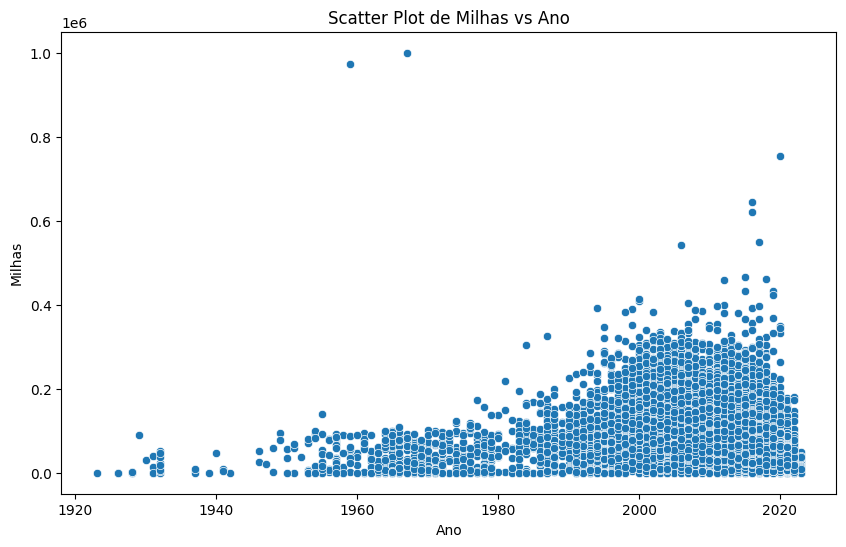

In [1375]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='mileage', data=cars_df)
plt.title('Scatter Plot de Milhas vs Ano')
plt.xlabel('Ano')
plt.ylabel('Milhas')
plt.show()

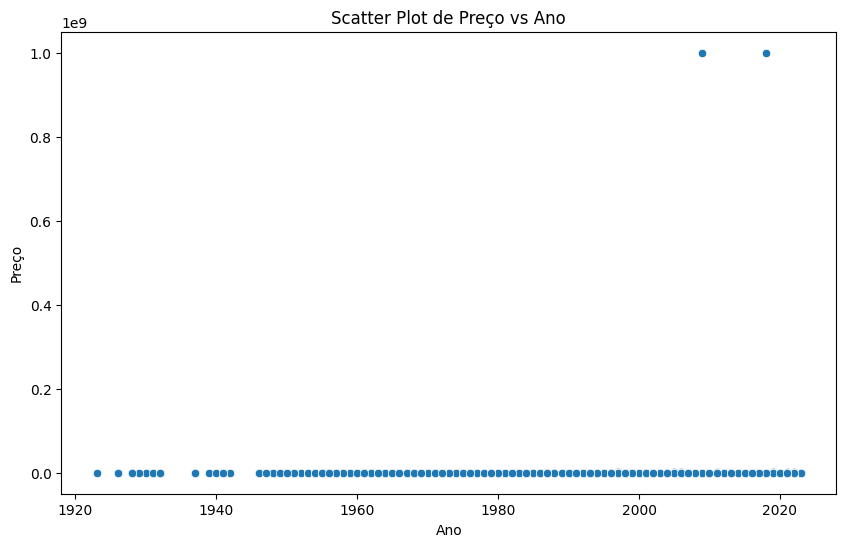

In [1376]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='price', data=cars_df)
plt.title('Scatter Plot de Preço vs Ano')
plt.xlabel('Ano')
plt.ylabel('Preço')
plt.show()

In [1377]:
# outliers em preços
cars_df[cars_df['price'] == 1000000000]

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
188260,Dodge,Durango Citadel,2018,113207.00,3.6L V6 24V MPFI DOHC,8-Speed Automatic,All-wheel Drive,Gasoline,18-25,DB Black Clearcoat,Black,0.00,1.00,1.00,"Rothrock Nissan, Chrysler, Dodge, Jeep, RAM",4.60,4.80,146.00,NaN,1000000000.00
108142,Chevrolet,Cobalt LT,2009,85185.00,2.2L I4 16V MPFI DOHC,4-Speed Automatic,Front-wheel Drive,Gasoline,NaN,Black,Gray,0.00,1.00,1.00,"Rothrock Nissan, Chrysler, Dodge, Jeep, RAM",4.60,4.20,90.00,NaN,1000000000.00


Vamos fazer também uma representação do valores faltantes.

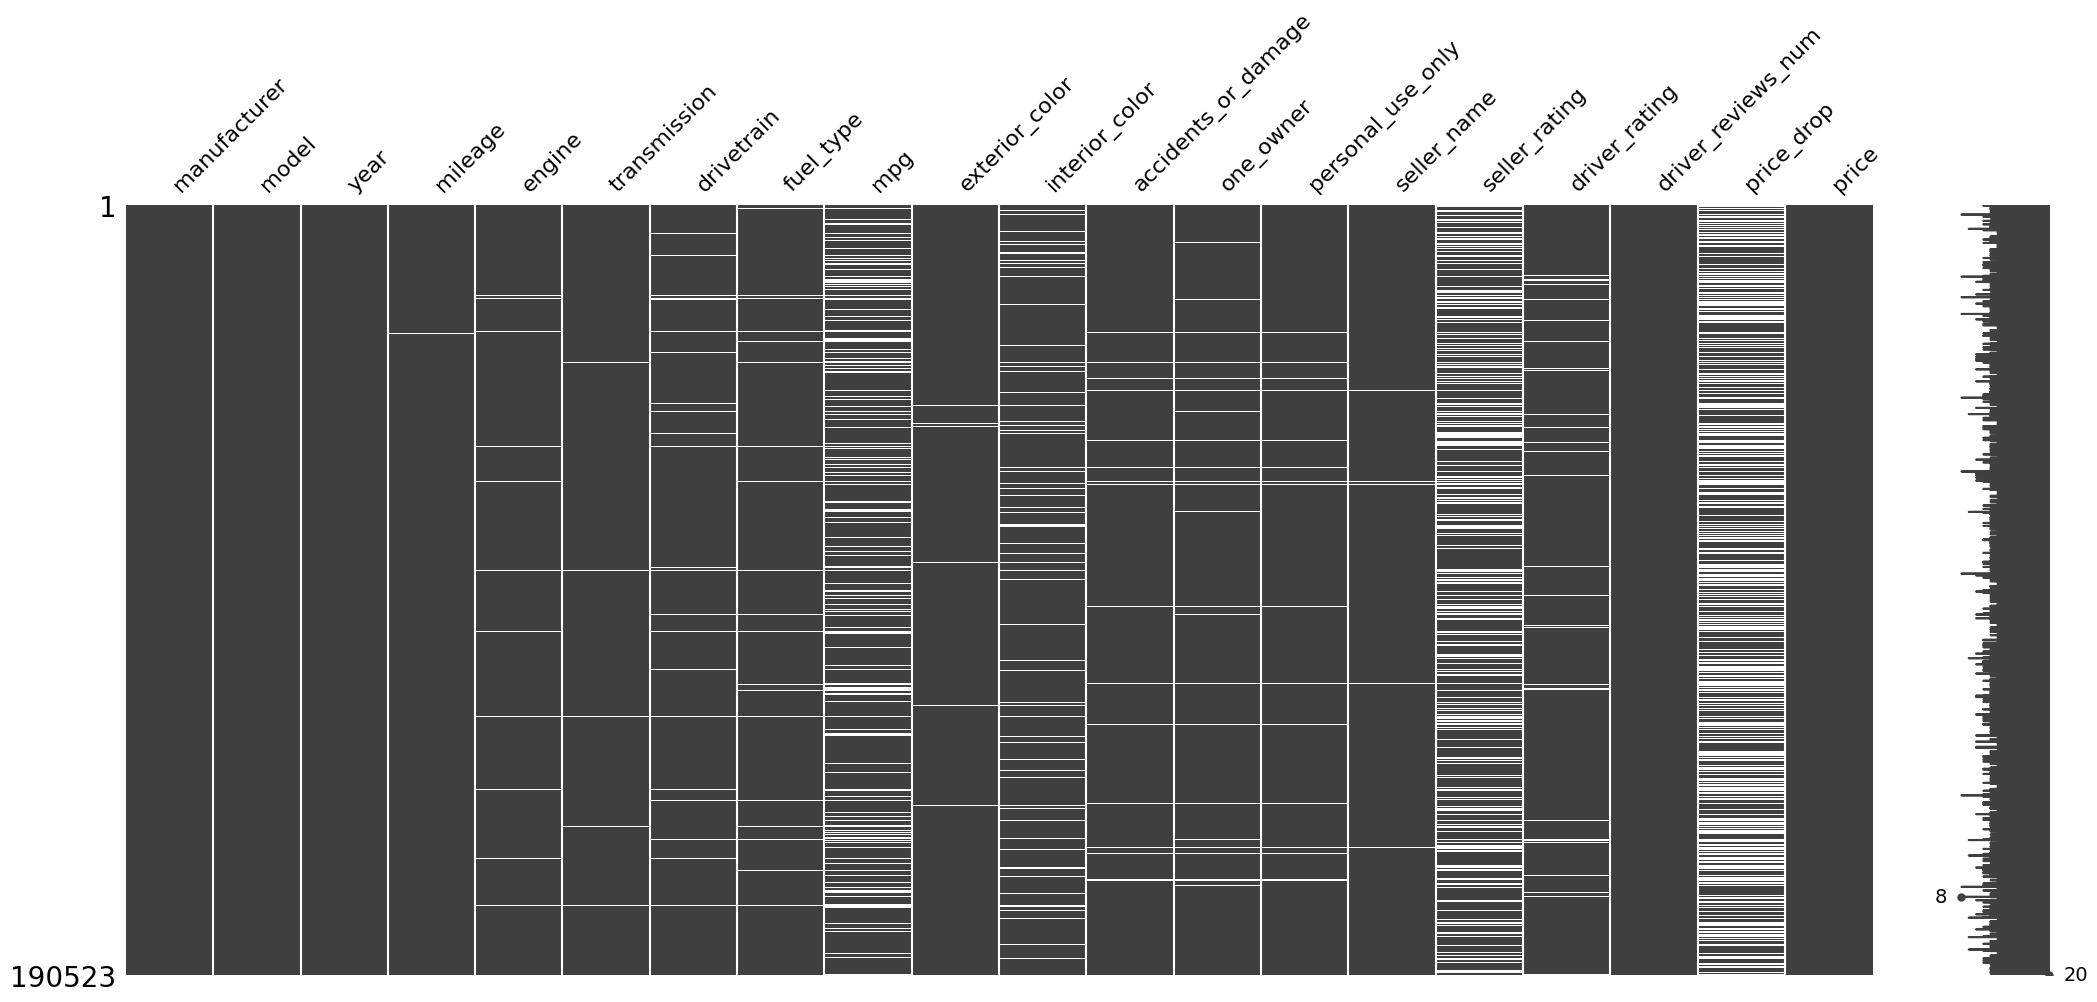

In [1378]:
import missingno as msno
msno.matrix(cars_df)
plt.show()

Acima, podemos ver que quase todas as colunas possuem valores faltantes, com exceção de ```manufacturer```, ```model```, ```year```, ```driver_reviews_num``` e ```price```. 

Vamos agora analisar e limpar algumas colunas com dados faltantes:

# 2. Limpeza dos Dados

## 2.1 Coluna ```price```

In [1379]:
cars_df['price'].describe()

count       190523.00
mean         43085.81
std        3239942.05
min            319.00
25%          19588.00
50%          27995.00
75%          39500.00
max     1000000000.00
Name: price, dtype: float64

Confirmando o que vimos acima, possuímos dois outliers em ```price```. Vamos exclui-los.

In [1380]:
cars_df = cars_df[cars_df['price'] < 1_000_000_000]

Agora podemos ver com mais clareza a distribuição dos valores em ```price```.

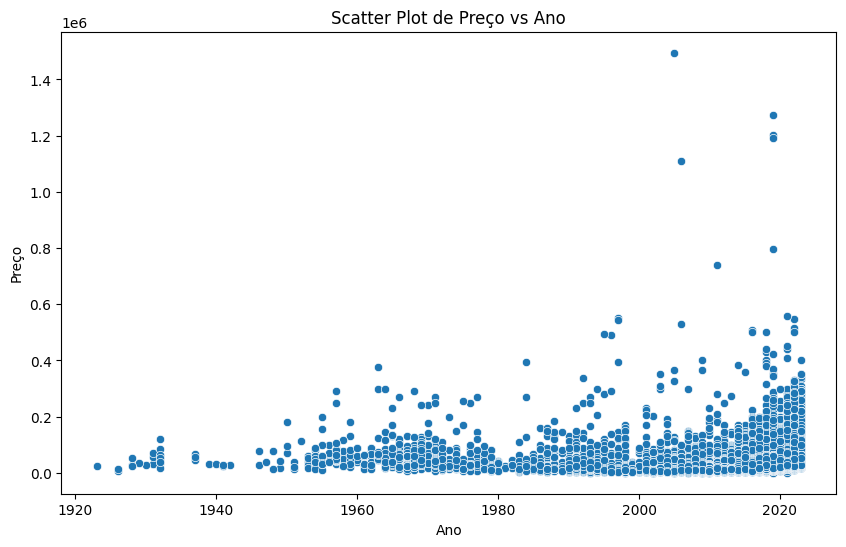

In [1381]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='price', data=cars_df)
plt.title('Scatter Plot de Preço vs Ano')
plt.xlabel('Ano')
plt.ylabel('Preço')
plt.show()

In [1382]:
cars_df[cars_df['price'] > 1000000]

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
91190,Cadillac,DTS,2006,158021.00,4.6L V8 32V MPFI DOHC,4-Speed Automatic with Overdrive,Front-wheel Drive,Gasoline,NaN,Radiant Bronze,NaN,0.00,0.00,1.00,Greve Chrysler Dodge Jeep RAM,3.40,4.60,79.00,NaN,1111111.00
615573,Porsche,911 Turbo S,2019,134.00,3.8L H6 24V GDI DOHC Twin Turbo,7-Speed Automatic with Auto-Shift,All-wheel Drive,Gasoline,19-24,Black,Black,0.00,1.00,1.00,OC Autosource,NaN,4.90,13.00,10000.00,1200888.00
613083,Porsche,Carrera GT,2005,5052.00,5.7L V10 40V MPFI DOHC,6-Speed Manual,Rear-wheel Drive,Gasoline,10-16,Silver,Brown,0.00,NaN,1.00,ZWECK,NaN,4.50,5.00,NaN,1495000.00
213647,Ford,GT,2019,3215.00,3.5L 6 Cylinder,7-Speed Automatic,Rear-wheel Drive,Gasoline,NaN,Heritage Blue,Black,0.00,0.00,1.00,Mercedes-Benz of Easton,4.60,NaN,0.00,935.00,1190000.00
213658,Ford,GT,2019,255.00,3.5L V6 Twin Turbo,7-Speed DCT Automatic,NaN,Gasoline,NaN,Red,NaN,0.00,0.00,0.00,Marino Performance Motors,NaN,NaN,0.00,15000.00,1275000.00


Em pesquisa em sites na internet, parece que o preço do Cadillac também representa um erro. Assim, a linha também será excluída.

In [1383]:
cars_df = cars_df[~(cars_df['price'] == 1111111)]

In [1384]:
cars_df[cars_df['price'] > 1000000]

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
615573,Porsche,911 Turbo S,2019,134.00,3.8L H6 24V GDI DOHC Twin Turbo,7-Speed Automatic with Auto-Shift,All-wheel Drive,Gasoline,19-24,Black,Black,0.00,1.00,1.00,OC Autosource,NaN,4.90,13.00,10000.00,1200888.00
613083,Porsche,Carrera GT,2005,5052.00,5.7L V10 40V MPFI DOHC,6-Speed Manual,Rear-wheel Drive,Gasoline,10-16,Silver,Brown,0.00,NaN,1.00,ZWECK,NaN,4.50,5.00,NaN,1495000.00
213647,Ford,GT,2019,3215.00,3.5L 6 Cylinder,7-Speed Automatic,Rear-wheel Drive,Gasoline,NaN,Heritage Blue,Black,0.00,0.00,1.00,Mercedes-Benz of Easton,4.60,NaN,0.00,935.00,1190000.00
213658,Ford,GT,2019,255.00,3.5L V6 Twin Turbo,7-Speed DCT Automatic,NaN,Gasoline,NaN,Red,NaN,0.00,0.00,0.00,Marino Performance Motors,NaN,NaN,0.00,15000.00,1275000.00


In [1385]:
sorted_cars_df = cars_df.sort_values(by='price', ascending=False)
sorted_cars_df.tail(50)

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
250565,Ford,Taurus SES,2000,240000.00,155.0HP 3.0L V6 Cylinder Engine Flex Fuel Capa...,4-Speed A/T,Front-wheel Drive,E85 Flex Fuel,NaN,Black,Beige,NaN,NaN,NaN,NaN,NaN,3.90,35.00,NaN,2000.00
70594,Buick,Lucerne CX,2006,102671.00,3.8L V-6 engine with 197HP,Automatic,Front-wheel Drive,Gasoline,19-26,Gold,Beige,1.00,0.00,0.00,Auto Brokers of Jacksonville,NaN,4.50,51.00,NaN,1999.00
181488,Dodge,Charger SE,2012,120242.00,"3.6L V-6 DOHC, variable valve control, engine ...",Automatic,Rear-wheel Drive,E85 Flex Fuel,19-27,Gray,Gray,0.00,0.00,0.00,Auto Brokers of Jacksonville,NaN,4.70,85.00,NaN,1999.00
78369,Buick,LaCrosse Premium 2,2012,179785.00,"3.6L V-6 gasoline direct injection, DOHC, vari...",Automatic,Front-wheel Drive,E85 Flex Fuel,17-27,Black,Black,1.00,0.00,1.00,Auto Brokers of Jacksonville,NaN,4.70,71.00,NaN,1999.00
535222,Mercedes-Benz,C-Class C240,2003,151000.00,168.0HP 2.6L V6 Cylinder Engine Gasoline Fuel,A/T,Rear-wheel Drive,Gasoline,NaN,Silver,Black,NaN,NaN,NaN,NaN,NaN,4.40,56.00,NaN,1999.00
141437,Chevrolet,Trailblazer LT,2006,289488.00,4.2L I6 24V MPFI DOHC,4-Speed Automatic,Four-wheel Drive,Gasoline,NaN,Graystone Metallic,Light Gray,0.00,0.00,1.00,Hank Graff Chevrolet,4.80,4.30,88.00,NaN,1999.00
368440,INFINITI,G37x Base,2012,112131.00,"VQ 3.7L V-6 DOHC, variable valve control, engi...",Automatic,All-wheel Drive,Gasoline,18-25,Black,Beige,0.00,0.00,0.00,Auto Brokers of Jacksonville,1.00,4.70,9.00,NaN,1999.00
292684,GMC,Yukon XL SLT,2003,254000.00,5.3L V8 16V MPFI OHV Flexible Fuel,4-Speed Automatic,4WD,Flexible Fuel,NaN,Polo Green Metallic,Neutral / Shale,NaN,NaN,NaN,Randy Wise Chrysler Dodge Jeep RAM,3.70,4.60,22.00,NaN,1997.00
498327,Mazda,Mazda6 iSport VE,2008,263416.00,2.3L I4 16V MPFI DOHC,5-Speed Automatic,Front-wheel Drive,Gasoline,21-28,Silver Metallic,Gray,0.00,0.00,0.00,Kia of Bradley,2.30,4.50,35.00,NaN,1995.00
487073,Lincoln,Town Car Signature,2007,352972.00,4.6L V8 16V MPFI SOHC,4-Speed Automatic,Rear-wheel Drive,NaN,17-25,Black,NaN,0.00,0.00,0.00,The Car House,2.90,4.70,38.00,500.00,1995.00


Não sei dizer se os menores valores de ```price``` também são outliers. Considerando que alguns detalhes sobre a condição dos carros podem estar fora do dataframe, decidi por manter esses valores.

## 2.2 Coluna ```manufacturer```

In [1386]:
cars_df['manufacturer'].value_counts()

manufacturer
Ford             19828
Toyota           14880
Chevrolet        13898
Nissan           12123
Jeep             10458
Mercedes-Benz    10147
Honda             9416
BMW               9264
Kia               8832
GMC               7325
Dodge             6321
Subaru            6175
Volkswagen        6157
Hyundai           5487
Lexus             5283
RAM               4935
Audi              4474
Cadillac          4467
Mazda             3893
Buick             3623
INFINITI          3192
Chrysler          3166
Land Rover        3049
Porsche           2973
Lincoln           2649
Volvo             2537
Acura             2098
Mitsubishi        1498
Tesla             1485
Jaguar             887
Name: count, dtype: int64

## 2.3 Coluna ```model```

In [1387]:
cars_df['model'].value_counts().head(100)

model
Fusion SE                    774
Corolla LE                   742
Sportage LX                  691
Sentra SV                    682
GLC 300 Base 4MATIC          657
Optima LX                    653
Sorento LX                   634
Explorer XLT                 632
RX 350 Base                  622
Tundra SR5                   618
Rogue SV                     615
Renegade Latitude            614
Wrangler Sport               600
Odyssey EX-L                 599
Edge SEL                     589
Forte LXS                    576
Encore Preferred             572
Focus SE                     570
F-150 XLT                    563
Escape SE                    538
Highlander XLE               519
Tiguan 2.0T SE               513
Pacifica Touring-L           510
Grand Caravan SXT            498
Grand Cherokee Limited       491
Frontier SV                  489
Ranger XLT                   483
RAV4 XLE                     481
Wrangler Unlimited Sahara    476
CX-5 Touring                 475
Yuko

In [1388]:
patterns = {
    r'Fusion SE.*': 'Fusion SE',
    r'Corolla LE.*': 'Corolla LE',
    r'Sportage LX.*': 'Sportage LX',
    r'Sentra SV.*': 'Sentra SV',
    r'GLC 300 Base 4MATIC.*': 'GLC 300 Base 4MATIC',
    r'Optima LX.*': 'Optima LX',
    r'Sorento LX.*': 'Sorento LX',
    r'Explorer XLT.*': 'Explorer XLT',
    r'RX 350 Base.*': 'RX 350 Base',
    r'Tundra SR5.*': 'Tundra SR5',
    r'Rogue SV.*': 'Rogue SV',
    r'Renegade Latitude.*': 'Renegade Latitude',
    r'Wrangler Sport.*': 'Wrangler Sport',
    r'Odyssey EX-L.*': 'Odyssey EX-L',
    r'Edge SEL.*': 'Edge SEL',
    r'Forte LXS.*': 'Forte LXS',
    r'Encore Preferred.*': 'Encore Preferred',
    r'Focus SE.*': 'Focus SE',
    r'F-150 XLT.*': 'F-150 XLT',
    r'Escape SE.*': 'Escape SE',
    r'Highlander XLE.*': 'Highlander XLE',
    r'Tiguan 2.0T SE.*': 'Tiguan 2.0T SE',
    r'Pacifica Touring-L.*': 'Pacifica Touring-L',
    r'Grand Caravan SXT.*': 'Grand Caravan SXT',
    r'Grand Cherokee Limited.*': 'Grand Cherokee Limited',
    r'Frontier SV.*': 'Frontier SV',
    r'Ranger XLT.*': 'Ranger XLT',
    r'RAV4 XLE.*': 'RAV4 XLE',
    r'Wrangler Unlimited Sahara.*': 'Wrangler Unlimited Sahara',
    r'CX-5 Touring.*': 'CX-5 Touring',
    r'Yukon Denali.*': 'Yukon Denali',
    r'Charger SXT.*': 'Charger SXT',
    r'Transit-250 Base.*': 'Transit-250 Base',
    r'Compass Latitude.*': 'Compass Latitude',
    r'Cherokee Limited.*': 'Cherokee Limited',
    r'C-Class C 300.*': 'C-Class C 300',
    r'Malibu LT.*': 'Malibu LT',
    r'Trax LT.*': 'Trax LT',
    r'1500 Big Horn.*': '1500 Big Horn',
    r'Camry SE.*': 'Camry SE',
    r'Pilot EX-L.*': 'Pilot EX-L',
    r'Wrangler Unlimited Sport.*': 'Wrangler Unlimited Sport',
    r'F-250 Lariat.*': 'F-250 Lariat',
    r'Jetta 1.4T S.*': 'Jetta 1.4T S',
    r'Equinox 1LT.*': 'Equinox 1LT',
    r'Civic LX.*': 'Civic LX',
    r'CR-V EX-L.*': 'CR-V EX-L',
    r'Terrain SLE.*': 'Terrain SLE',
    r'Rogue Sport S.*': 'Rogue Sport S',
    r'Altima 2.5 S.*': 'Altima 2.5 S',
    r'Terrain SLT.*': 'Terrain SLT',
    r'CR-V EX.*': 'CR-V EX',
    r'Versa 1.6 SV.*': 'Versa 1.6 SV',
    r'C-Class C 300 4MATIC.*': 'C-Class C 300 4MATIC',
    r'CX-5 Grand Touring.*': 'CX-5 Grand Touring',
    r'XT5 Luxury.*': 'XT5 Luxury',
    r'GLE 350 Base 4MATIC.*': 'GLE 350 Base 4MATIC',
    r'Sierra 2500 Denali.*': 'Sierra 2500 Denali',
    r'QX60 Luxe.*': 'QX60 Luxe',
    r'ES 350 Base.*': 'ES 350 Base',
    r'X3 xDrive30i.*': 'X3 xDrive30i',
    r'X5 xDrive40i.*': 'X5 xDrive40i',
    r'F-350 Lariat Super Duty.*': 'F-350 Lariat Super Duty',
    r'GLC 300 Base.*': 'GLC 300 Base',
    r'Pacifica Limited.*': 'Pacifica Limited',
    r'Murano SL.*': 'Murano SL',
    r'Sierra 1500 SLT.*': 'Sierra 1500 SLT',
    r'Durango GT.*': 'Durango GT',
    r'Acadia Denali.*': 'Acadia Denali',
    r'Compass Limited.*': 'Compass Limited',
    r'2500 Big Horn.*': '2500 Big Horn',
    r'330 i xDrive.*': '330 i xDrive',
    r'GX 460 Base.*': 'GX 460 Base',
    r'Elantra SEL.*': 'Elantra SEL',
    r'EcoSport SE.*': 'EcoSport SE',
    r'1500 Classic SLT.*': '1500 Classic SLT',
    r'4Runner SR5.*': '4Runner SR5',
    r'F-250 XLT.*': 'F-250 XLT',
    r'2500 Laramie.*': '2500 Laramie',
    r'Gladiator Sport.*': 'Gladiator Sport',
    r'Camry LE.*': 'Camry LE',
    r'RAV4 LE.*': 'RAV4 LE',
    r'Yukon SLT.*': 'Yukon SLT',
    r'Expedition Limited.*': 'Expedition Limited',
    r'Trax LS.*': 'Trax LS',
    r'Yukon XL Denali.*': 'Yukon XL Denali',
    r'Blazer 2LT.*': 'Blazer 2LT',
    r'Tahoe LT.*': 'Tahoe LT',
    r'Sienna LE.*': 'Sienna LE',
    r'ProMaster 2500 High Roof.*': 'ProMaster 2500 High Roof',
    r'Gladiator Rubicon.*': 'Gladiator Rubicon',
    r'330 i.*': '330 i',
    r'Soul Base.*': 'Soul Base',
    r'Mustang GT Premium.*': 'Mustang GT Premium',
    r'Sienna XLE.*': 'Sienna XLE',
    r'Edge Titanium.*': 'Edge Titanium',
    r'Q5 2.0T Premium Plus.*': 'Q5 2.0T Premium Plus',
    r'Rogue S.*': 'Rogue S',
    r'Tacoma TRD Off Road.*': 'Tacoma TRD Off Road',
    r'Envision Essence.*': 'Envision Essence'
}

def categorize_model(model):
    for pattern, category in patterns.items():
        if re.match(pattern, model, re.IGNORECASE):
            return category
    return model  

cars_df['category'] = cars_df['model'].apply(categorize_model)

Tentei usar regex para reduzir a quantidade de modelos, mas a tarefa se mostrou infindável. Consegui reduzir de 7963 para 7763. Mesmo assim, a solução terá que ser outra.

In [1389]:
cars_df['category'].value_counts()

category
Altima 2.5 S                                            1105
C-Class C 300                                            917
Fusion SE                                                900
Rogue Sport S                                            811
Escape SE                                                796
                                                        ... 
Corolla Hatchback UP CAMERA BLUETOOTH COMPATIBLE!          1
XJ8 4dr Sdn                                                1
Santa Fe Sport SPORT                                       1
Transit-250 T-250 148 MED RF 9000 GVWR SLIDING RH DR       1
S-Type 4.0                                                 1
Name: count, Length: 7763, dtype: int64

In [1390]:
cars_df.drop('model', axis=1, inplace=True)

cars_df.rename(columns={'category': 'model'}, inplace=True)

In [1391]:
cars_df

,manufacturer,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price,model
456056,Land Rover,2018,33585.00,V6,Automatic,Four-wheel Drive,Gasoline,17-23,Santorini Black,Ebony,0.00,1.00,0.00,Schaumburg Ford,4.10,4.00,45.00,500.00,53950.00,Range Rover Sport HSE Dynamic
563956,Nissan,2017,63009.00,5.6L V8 32V GDI DOHC,7-Speed Automatic,Rear-wheel Drive,Gasoline,14-19,Black,Almond,0.00,0.00,1.00,World Auto Inc.,2.30,4.70,78.00,NaN,27885.00,Armada SL
724184,Toyota,2018,51316.00,"I-FORCE 5.7L V-8 DOHC, VVT-i variable valve co...",Automatic,Four-wheel Drive,Gasoline,13-17,SILVER,Brown/Black,0.00,NaN,1.00,CAL Cars,4.40,4.80,199.00,1000.00,46995.00,Tundra 1794
706657,Toyota,2015,89444.00,3.5L V6 24V MPFI DOHC,6-Speed Automatic,Front-wheel Drive,Gasoline,21-31,Cosmic Gray Mica,Light Gray,0.00,1.00,1.00,Scanlon Lexus,4.70,4.70,74.00,482.00,17987.00,Avalon XLE
551197,Mercedes-Benz,2023,2191.00,3.0L I6 24V GDI DOHC Turbo,9-Speed Automatic,All-wheel Drive,Gasoline,NaN,2191,Tartufo Brown,0.00,1.00,1.00,Lupient Buick GMC,4.50,NaN,0.00,5969.00,96648.00,GLS 450 4MATIC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340527,Hyundai,2017,52900.00,"Nu 2L I-4 DOHC, D-CVVT variable valve control,...",6-Speed Automatic,Front-wheel Drive,Gasoline,29-38,Lakeside Blue,Gray,0.00,0.00,0.00,Bommarito Nissan Hazelwood,4.80,4.70,640.00,NaN,16995.00,Elantra SE
618501,RAM,2015,45195.00,3.0L I4 16V DDI DOHC Turbo Diesel,Automatic,Front-wheel Drive,Diesel,NaN,Bright White Clearcoat,Gray,0.00,0.00,1.00,Woody's Dodge Jeep Chrysler RAM,4.60,4.10,5.00,NaN,54870.00,ProMaster 1500 Low Roof
673837,Toyota,2013,160000.00,3.5L V6 24V MPFI DOHC,5-Speed Automatic,All-wheel Drive,Gasoline,17-22,White,Beige,0.00,1.00,1.00,Trade Guru,3.40,4.70,140.00,NaN,13991.00,Highlander
291906,GMC,2016,102462.00,6.2L V8 16V GDI OHV,8-Speed Automatic,Rear-wheel Drive,Gasoline,15-22,Onyx Black,Jet Black,0.00,0.00,1.00,Murray Ford Superstore,4.80,4.70,26.00,213.00,32777.00,Yukon XL Denali


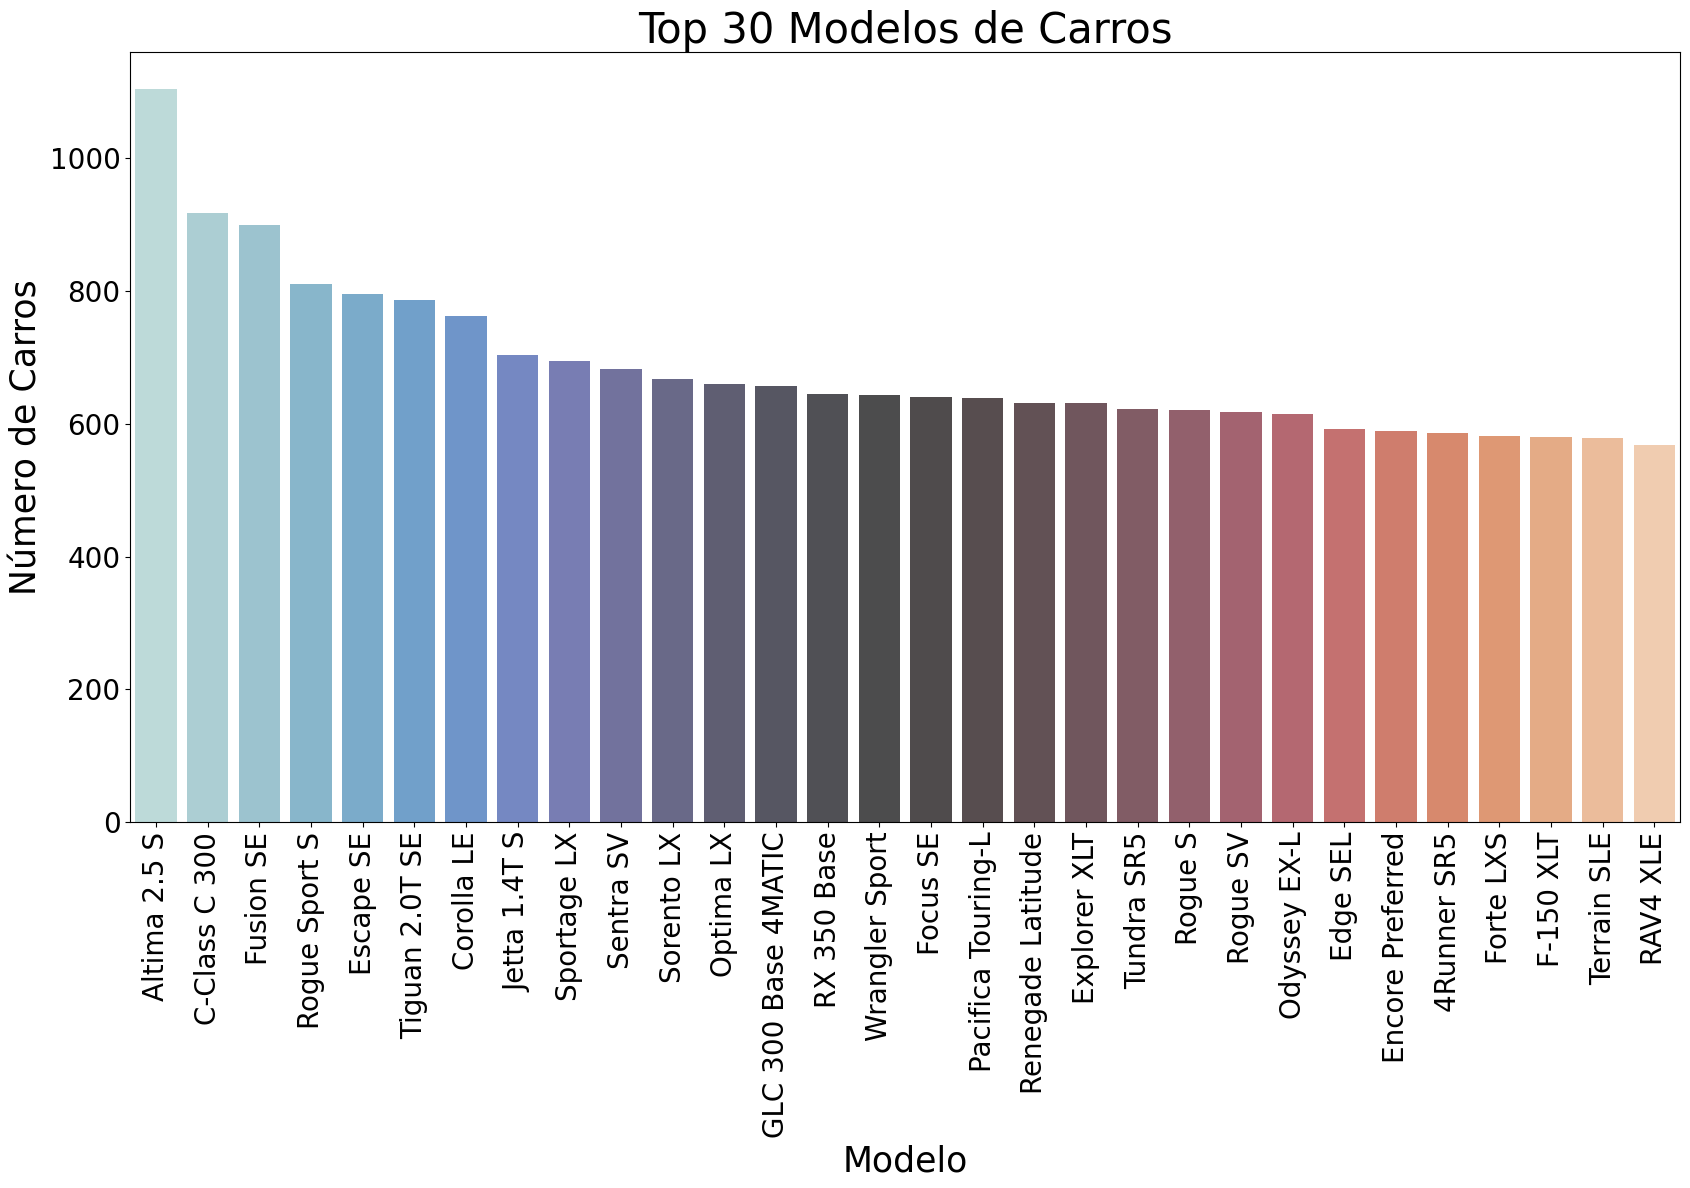

In [1392]:
top_30_models = cars_df['model'].value_counts().head(30)

# Create a color palette
rainbow_palette = sns.color_palette("icefire", len(top_30_models))

# Plot
plt.figure(figsize=(20, 10))
sns.barplot(x=top_30_models.index, y=top_30_models.values, hue=top_30_models.index, palette=rainbow_palette, alpha=0.8, legend=False)
plt.title('Top 30 Modelos de Carros', fontsize=30)
plt.ylabel('Número de Carros', fontsize=25)
plt.xlabel('Modelo', fontsize=25)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.show()

## 2.4 Coluna ```year```

In [1393]:
cars_df['year'].value_counts()

year
2020    33483
2021    27239
2019    26364
2022    20143
2018    15661
2017    13189
2016    10725
2015     9250
2014     6867
2013     5366
2023     4615
2012     3890
2011     2930
2010     1915
2008     1555
2007     1307
2009     1220
2006      898
2005      703
2004      580
2003      424
2002      353
2001      251
2000      191
1999      118
1997       98
1998       89
1995       70
1994       55
1993       50
1991       46
1996       45
1969       42
1988       42
1990       41
1992       37
1987       36
1966       32
1972       28
1970       28
1968       27
1978       26
1971       26
1979       26
1967       26
1986       25
1965       25
1957       24
1989       21
1964       20
1983       20
1976       20
1955       18
1974       17
1985       17
1973       17
1977       16
1984       16
1963       14
1975       14
1980       12
1962       11
1932       10
1954       10
1959        9
1961        8
1982        7
1958        6
1956        6
1953        6
1960        5
1

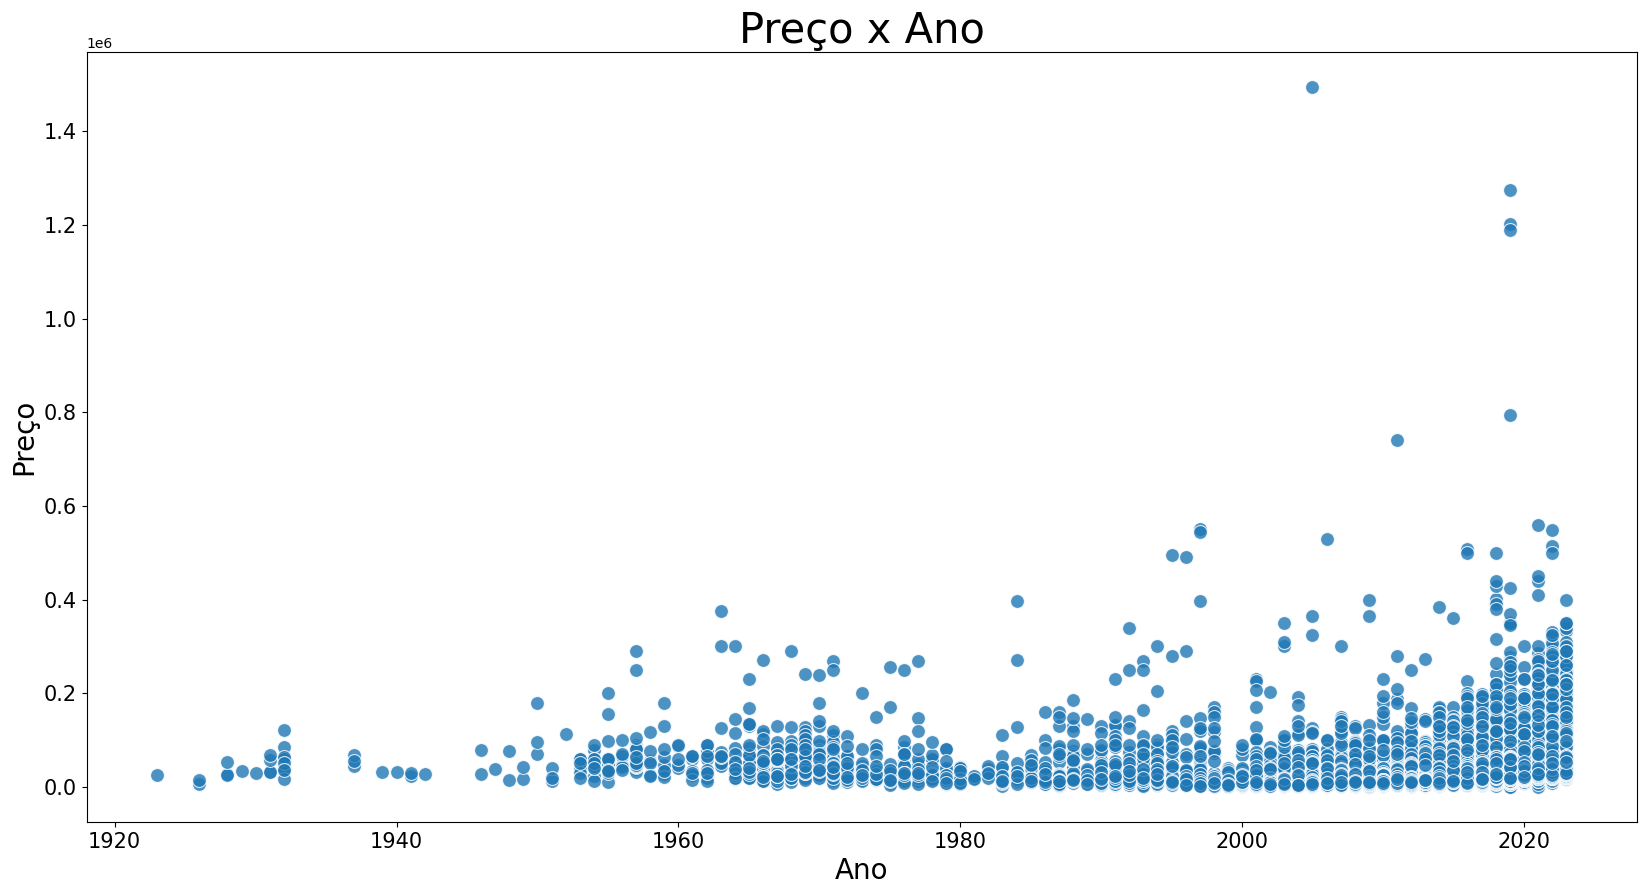

In [1394]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x='year', y='price', data=cars_df, s=100, alpha=0.8)
plt.title('Preço x Ano', fontsize=30)
plt.xlabel('Ano', fontsize=20)
plt.ylabel('Preço', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## 2.5 Coluna ```mileage```

In [1395]:
cars_df['mileage'].isna().sum()

120

Podemos subsituir as milhas faltantes pela média anual das milhas.

In [1396]:
mean_mileage_by_year = cars_df.groupby('year')['mileage'].transform('mean')

In [1397]:
cars_df['mileage'] = cars_df['mileage'].fillna(mean_mileage_by_year)

In [1398]:
cars_df['mileage'].isna().sum()

0

## 2.6 Coluna ```engine```

In [1399]:
cars_df['engine'].value_counts()

engine
2.0L I4 16V GDI DOHC Turbo                                     18828
3.6L V6 24V MPFI DOHC                                           8944
3.6L V6 24V GDI DOHC                                            6662
2.0L I4 16V MPFI DOHC                                           4810
1.5L I4 16V GDI DOHC Turbo                                      4504
                                                               ...  
3.9L V8 DOHC 32V                                                   1
4.0L DOHC 24-valve V6 engine                                       1
MultiAir 2.4L I-4 variable valve control, engine with 180HP        1
247.0HP 2.3L 5 Cylinder Engine Gasoline Fuel                       1
3.6L H-6 engine with 282HP                                         1
Name: count, Length: 3902, dtype: int64

In [1400]:
def extract_engine_info(engine_str):
    if not isinstance(engine_str, str):
        return pd.Series([None, None, None])
    
    # Extraindo tamanho do motor em litros
    size_match = re.search(r'(\d+\.\d+)L', engine_str)
    size = float(size_match.group(1)) if size_match else None
    
    # Extraindo número de cilindros
    cyl_match = re.search(r'(\d+) Cylinder|(\d+)Cyl|(\d+)V|(\d+)\s*V|(\d+)-Cylinder|(\d+)-cylinder|(\d+) Cyl', engine_str, re.IGNORECASE)
    if cyl_match:
        cyl = [group for group in cyl_match.groups() if group is not None][0]
        cylinders = int(cyl)
    else:
        cylinders = None
    
    # Verificar se é Turbo (1 = sim, 0 = não)
    turbo = 1 if 'Turbo' in engine_str else 0
    
    return pd.Series([size, cylinders, turbo])

cars_df[['engine_size_L', 'cylinders', 'turbo']] = cars_df['engine'].apply(extract_engine_info)

cars_df

,manufacturer,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,...,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price,model,engine_size_L,cylinders,turbo
456056,Land Rover,2018,33585.00,V6,Automatic,Four-wheel Drive,Gasoline,17-23,Santorini Black,Ebony,...,Schaumburg Ford,4.10,4.00,45.00,500.00,53950.00,Range Rover Sport HSE Dynamic,NaN,NaN,0.00
563956,Nissan,2017,63009.00,5.6L V8 32V GDI DOHC,7-Speed Automatic,Rear-wheel Drive,Gasoline,14-19,Black,Almond,...,World Auto Inc.,2.30,4.70,78.00,NaN,27885.00,Armada SL,5.60,32.00,0.00
724184,Toyota,2018,51316.00,"I-FORCE 5.7L V-8 DOHC, VVT-i variable valve co...",Automatic,Four-wheel Drive,Gasoline,13-17,SILVER,Brown/Black,...,CAL Cars,4.40,4.80,199.00,1000.00,46995.00,Tundra 1794,5.70,NaN,0.00
706657,Toyota,2015,89444.00,3.5L V6 24V MPFI DOHC,6-Speed Automatic,Front-wheel Drive,Gasoline,21-31,Cosmic Gray Mica,Light Gray,...,Scanlon Lexus,4.70,4.70,74.00,482.00,17987.00,Avalon XLE,3.50,24.00,0.00
551197,Mercedes-Benz,2023,2191.00,3.0L I6 24V GDI DOHC Turbo,9-Speed Automatic,All-wheel Drive,Gasoline,NaN,2191,Tartufo Brown,...,Lupient Buick GMC,4.50,NaN,0.00,5969.00,96648.00,GLS 450 4MATIC,3.00,24.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340527,Hyundai,2017,52900.00,"Nu 2L I-4 DOHC, D-CVVT variable valve control,...",6-Speed Automatic,Front-wheel Drive,Gasoline,29-38,Lakeside Blue,Gray,...,Bommarito Nissan Hazelwood,4.80,4.70,640.00,NaN,16995.00,Elantra SE,NaN,NaN,0.00
618501,RAM,2015,45195.00,3.0L I4 16V DDI DOHC Turbo Diesel,Automatic,Front-wheel Drive,Diesel,NaN,Bright White Clearcoat,Gray,...,Woody's Dodge Jeep Chrysler RAM,4.60,4.10,5.00,NaN,54870.00,ProMaster 1500 Low Roof,3.00,16.00,1.00
673837,Toyota,2013,160000.00,3.5L V6 24V MPFI DOHC,5-Speed Automatic,All-wheel Drive,Gasoline,17-22,White,Beige,...,Trade Guru,3.40,4.70,140.00,NaN,13991.00,Highlander,3.50,24.00,0.00
291906,GMC,2016,102462.00,6.2L V8 16V GDI OHV,8-Speed Automatic,Rear-wheel Drive,Gasoline,15-22,Onyx Black,Jet Black,...,Murray Ford Superstore,4.80,4.70,26.00,213.00,32777.00,Yukon XL Denali,6.20,16.00,0.00


Agora precisamos preencher os valores faltantes nas novas colunas. Decidi preencher da seguinte forma:
* o tamanho do motor (```engine_size_L```) pela **média**, uma vez que é um valor contínuo;
* quantidade de cilindros (```cylinders```) será substituída pela **moda**; 
* e turbo (```turbo```) será **binário** (1 para sim e 0 para não possui turbo). 

In [1401]:
cars_df['engine_size_L'] = cars_df['engine_size_L'].fillna(cars_df['engine_size_L'].mean())
cars_df['cylinders'] = cars_df['cylinders'].fillna(cars_df['cylinders'].mode()[0])
cars_df['turbo'] = cars_df['turbo'].fillna(cars_df['turbo'].mode()[0])

In [1402]:
cars_df['engine_size_L'].isna().sum()

0

In [1403]:
cars_df['cylinders'].isna().sum()

0

In [1404]:
cars_df['turbo'].isna().sum()

0

In [1405]:
# deletando engine
cars_df.drop('engine', axis=1, inplace=True)

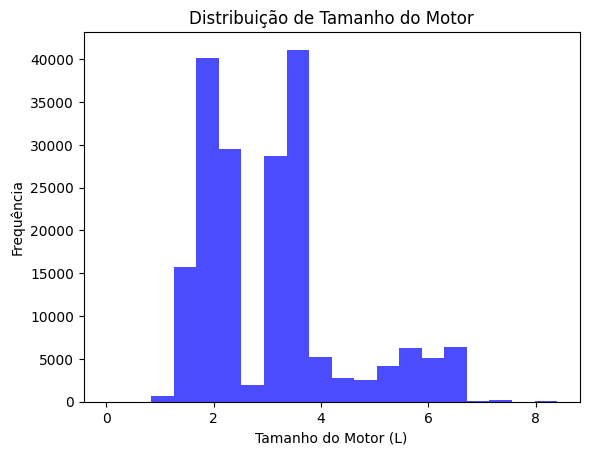

In [1406]:
plt.hist(cars_df['engine_size_L'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Tamanho do Motor (L)')
plt.ylabel('Frequência')
plt.title('Distribuição de Tamanho do Motor')
plt.show()

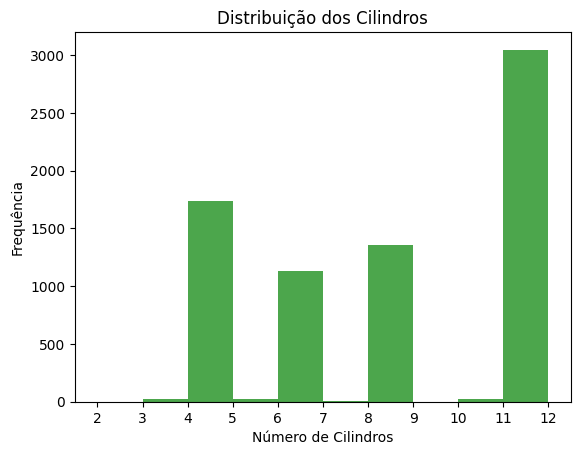

In [1407]:
plt.hist(cars_df['cylinders'], bins=range(2, 13), color='green', alpha=0.7)
plt.xlabel('Número de Cilindros')
plt.ylabel('Frequência')
plt.title('Distribuição dos Cilindros')
plt.xticks(range(2, 13))
plt.show()

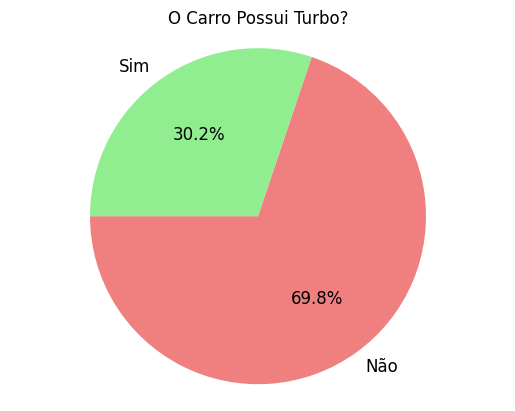

In [1493]:
turbo_counts = cars_df['turbo'].value_counts()
plt.pie(turbo_counts, labels=['Não', 'Sim'], colors=['lightcoral', 'lightgreen'], autopct='%1.1f%%', startangle=180, textprops={'fontsize': 12})
plt.axis('equal')
plt.title('O Carro Possui Turbo?')
plt.show()

## 2.7 Coluna ```transmission```

In [1409]:
pd.set_option("display.max_rows", 100)
cars_df['transmission'].value_counts()

transmission
6-Speed Automatic                                                   37121
8-Speed Automatic                                                   34779
Automatic CVT                                                       27263
Automatic                                                           24306
9-Speed Automatic                                                   15314
                                                                    ...  
Aisin e-CVT Powersplit                                                  1
5-Speed Automatic with SelectShift                                      1
Wide-range 5-speed automatic transmission w/OD, lockup torque co        1
7-SPEED AUTOMATIC                                                       1
Auto, 8-Spd M Sport Drivelogic/Sport/Manual Modes                       1
Name: count, Length: 654, dtype: int64

Decidi criar apenas 5 categorias de transmissão para reduzir os valores únicos dessa coluna. De início eram 6, no entanto, apenas um carro ficou na categoria Tiptronic. Assim, achei melhor colocá-lo na categoria ```Other```. 

In [1410]:
# criando uma função para lidar com os valores na coluna transmission:
def classify_transmission(transmission):
    patterns = {
        'Manual': r'(Manual|M\/T)\b',
        'Automatic': r'(Automatic|Auto|A\/T|AWD)\b',
        'CVT': r'(CVT|Cvt|Variable Transmission)\b',
        'Semi-Auto': r'(Automatic\s+(?:with\s+)?(Auto-Shift|PowerShift|Geartronic))\b',
        'Dual-Clutch': r'(DCT|Dual Clutch|Dual)\b'
    }
    
    if pd.isnull(transmission): 
        return 'Other' 
    
    for category, pattern in patterns.items():
        if re.search(pattern, transmission, re.IGNORECASE):
            return category
    
    return 'Other' 

# aplicando a função
cars_df['category'] = cars_df['transmission'].apply(classify_transmission)
cars_df['category'].value_counts()

category
Automatic      178752
Manual           5964
Other            4095
CVT              1403
Dual-Clutch       306
Name: count, dtype: int64

In [1411]:
# retirando a coluna transmission e renomeando category
cars_df.drop('transmission', axis=1, inplace=True)

cars_df.rename(columns={'category': 'transmission'}, inplace=True)

In [1412]:
cars_df.head()

,manufacturer,year,mileage,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,...,seller_rating,driver_rating,driver_reviews_num,price_drop,price,model,engine_size_L,cylinders,turbo,transmission
456056,Land Rover,2018,33585.00,Four-wheel Drive,Gasoline,17-23,Santorini Black,Ebony,0.00,1.00,...,4.10,4.00,45.00,500.00,53950.00,Range Rover Sport HSE Dynamic,3.12,16.00,0.00,Automatic
563956,Nissan,2017,63009.00,Rear-wheel Drive,Gasoline,14-19,Black,Almond,0.00,0.00,...,2.30,4.70,78.00,NaN,27885.00,Armada SL,5.60,32.00,0.00,Automatic
724184,Toyota,2018,51316.00,Four-wheel Drive,Gasoline,13-17,SILVER,Brown/Black,0.00,NaN,...,4.40,4.80,199.00,1000.00,46995.00,Tundra 1794,5.70,16.00,0.00,Automatic
706657,Toyota,2015,89444.00,Front-wheel Drive,Gasoline,21-31,Cosmic Gray Mica,Light Gray,0.00,1.00,...,4.70,4.70,74.00,482.00,17987.00,Avalon XLE,3.50,24.00,0.00,Automatic
551197,Mercedes-Benz,2023,2191.00,All-wheel Drive,Gasoline,NaN,2191,Tartufo Brown,0.00,1.00,...,4.50,NaN,0.00,5969.00,96648.00,GLS 450 4MATIC,3.00,24.00,1.00,Automatic


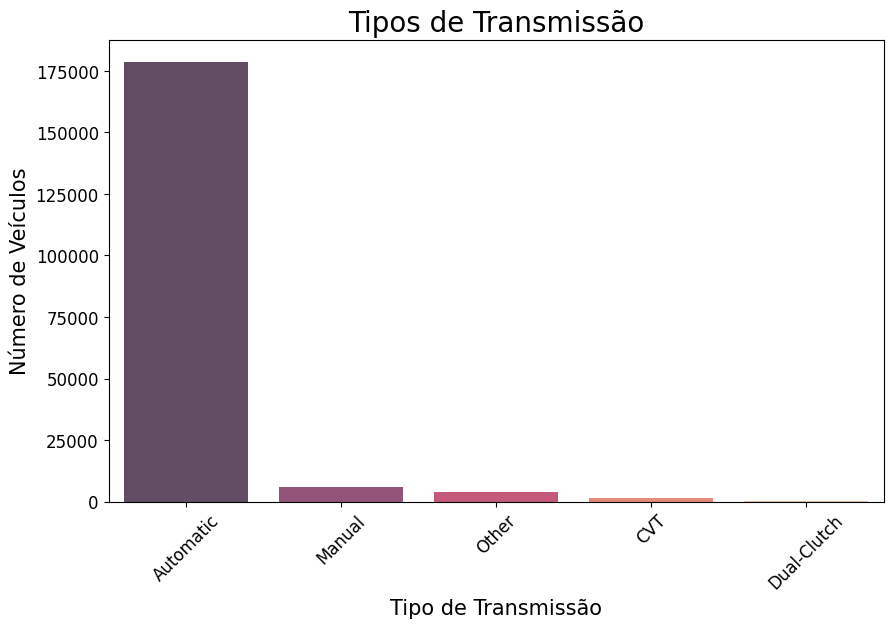

In [1413]:
transmission_counts = cars_df['transmission'].value_counts()

rainbow_palette = sns.color_palette("rocket", len(transmission_counts))

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=transmission_counts.index, y=transmission_counts.values, hue=transmission_counts.index, palette=rainbow_palette, alpha=0.8)
plt.title('Tipos de Transmissão', fontsize=20)
plt.ylabel('Número de Veículos', fontsize=15)
plt.xlabel('Tipo de Transmissão', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Podemos ver que a transmissão automática é a predominante. Diante da grande disparidade, é possível que essa coluna atrapalhe a nossa previsão de preços.

## 2.8 Coluna ```drivetrain```

Valores únicos de ```drivetrain```:

In [1414]:
cars_df['drivetrain'].value_counts()

drivetrain
Front-wheel Drive                                              60220
All-wheel Drive                                                57706
Four-wheel Drive                                               39350
Rear-wheel Drive                                               24325
FWD                                                             1563
AWD                                                              910
4WD                                                              480
RWD                                                              446
All-Wheel Drive                                                   33
Unknown                                                           27
Front-Wheel Drive                                                 26
Four-Wheel Drive with Locking and Limited-Slip Differential       13
Front-Wheel Drive with Limited-Slip Differential                  11
Four-Wheel Drive                                                  10
Rear-Wheel Drive       

Valores ```NaN```:

In [1415]:
cars_df['drivetrain'].isna().sum()

5362

In [1416]:
def classify_drivetrain(drivetrain):
    patterns = {
        'FWD': r'(Front|FWD)\b',
        'AWD': r'(All|AWD)\b',
        '4WD': r'(4x4|Four|4WD)\b',
        'RWD': r'(Rear|4x2|RWD)\b'
    }
    
    if pd.isnull(drivetrain): 
        return 'Other' 
    
    for category, pattern in patterns.items():
        if re.search(pattern, drivetrain, re.IGNORECASE):
            return category
    
    return 'Other' 

# aplicando a função
cars_df['category'] = cars_df['drivetrain'].apply(classify_drivetrain)
cars_df['category'].value_counts()

category
FWD      61826
AWD      58662
4WD      39861
RWD      24782
Other     5389
Name: count, dtype: int64

In [1417]:
cars_df.head()

,manufacturer,year,mileage,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,...,driver_rating,driver_reviews_num,price_drop,price,model,engine_size_L,cylinders,turbo,transmission,category
456056,Land Rover,2018,33585.00,Four-wheel Drive,Gasoline,17-23,Santorini Black,Ebony,0.00,1.00,...,4.00,45.00,500.00,53950.00,Range Rover Sport HSE Dynamic,3.12,16.00,0.00,Automatic,4WD
563956,Nissan,2017,63009.00,Rear-wheel Drive,Gasoline,14-19,Black,Almond,0.00,0.00,...,4.70,78.00,NaN,27885.00,Armada SL,5.60,32.00,0.00,Automatic,RWD
724184,Toyota,2018,51316.00,Four-wheel Drive,Gasoline,13-17,SILVER,Brown/Black,0.00,NaN,...,4.80,199.00,1000.00,46995.00,Tundra 1794,5.70,16.00,0.00,Automatic,4WD
706657,Toyota,2015,89444.00,Front-wheel Drive,Gasoline,21-31,Cosmic Gray Mica,Light Gray,0.00,1.00,...,4.70,74.00,482.00,17987.00,Avalon XLE,3.50,24.00,0.00,Automatic,FWD
551197,Mercedes-Benz,2023,2191.00,All-wheel Drive,Gasoline,NaN,2191,Tartufo Brown,0.00,1.00,...,NaN,0.00,5969.00,96648.00,GLS 450 4MATIC,3.00,24.00,1.00,Automatic,AWD


In [1418]:
# retirando a coluna drivetrain e renomeando category
cars_df.drop('drivetrain', axis=1, inplace=True)
cars_df.rename(columns={'category': 'drivetrain'}, inplace=True)
cars_df.head()

,manufacturer,year,mileage,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,...,driver_rating,driver_reviews_num,price_drop,price,model,engine_size_L,cylinders,turbo,transmission,drivetrain
456056,Land Rover,2018,33585.00,Gasoline,17-23,Santorini Black,Ebony,0.00,1.00,0.00,...,4.00,45.00,500.00,53950.00,Range Rover Sport HSE Dynamic,3.12,16.00,0.00,Automatic,4WD
563956,Nissan,2017,63009.00,Gasoline,14-19,Black,Almond,0.00,0.00,1.00,...,4.70,78.00,NaN,27885.00,Armada SL,5.60,32.00,0.00,Automatic,RWD
724184,Toyota,2018,51316.00,Gasoline,13-17,SILVER,Brown/Black,0.00,NaN,1.00,...,4.80,199.00,1000.00,46995.00,Tundra 1794,5.70,16.00,0.00,Automatic,4WD
706657,Toyota,2015,89444.00,Gasoline,21-31,Cosmic Gray Mica,Light Gray,0.00,1.00,1.00,...,4.70,74.00,482.00,17987.00,Avalon XLE,3.50,24.00,0.00,Automatic,FWD
551197,Mercedes-Benz,2023,2191.00,Gasoline,NaN,2191,Tartufo Brown,0.00,1.00,1.00,...,NaN,0.00,5969.00,96648.00,GLS 450 4MATIC,3.00,24.00,1.00,Automatic,AWD


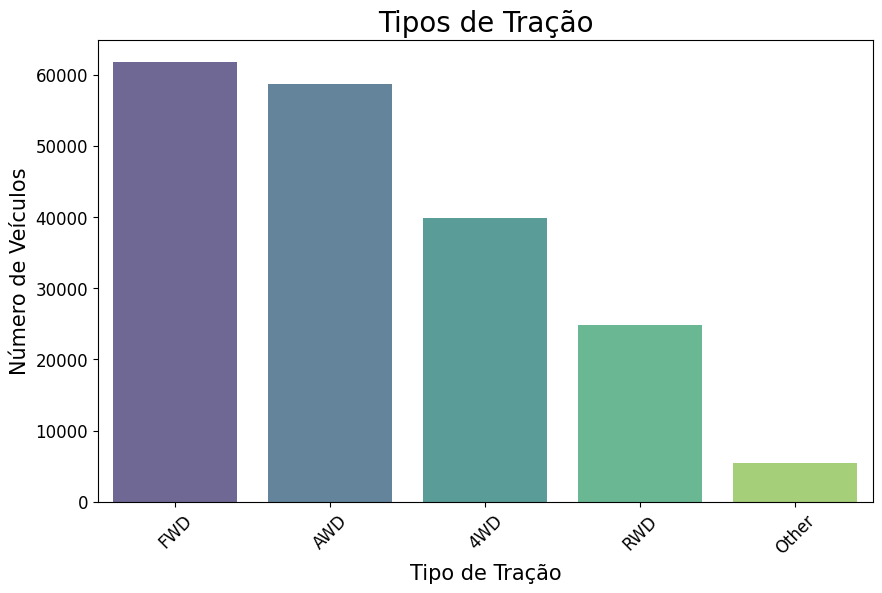

In [1419]:
drivetrain_counts = cars_df['drivetrain'].value_counts()

# Paleta de cores
rainbow_palette = sns.color_palette("viridis", len(drivetrain_counts))

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=drivetrain_counts.index, y=drivetrain_counts.values, hue=drivetrain_counts.index, palette=rainbow_palette, alpha=0.8)
plt.title('Tipos de Tração', fontsize=20)
plt.ylabel('Número de Veículos', fontsize=15)
plt.xlabel('Tipo de Tração', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## 2.9 Coluna ```fuel_type```

In [1420]:
cars_df['fuel_type'].value_counts()


fuel_type
Gasoline                         161115
Hybrid                             7270
Diesel                             7044
E85 Flex Fuel                      4641
Electric                           4033
B                                   348
Flexible Fuel                       125
Plug-In Hybrid                       30
Gasoline Fuel                        29
Gasoline/Mild Electric Hybrid        20
Regular Unleaded                     13
G                                    12
Premium Unleaded                     11
Compressed Natural Gas                6
Unspecified                           6
Gaseous                               2
Hydrogen Fuel Cell                    2
Electric Fuel System                  2
Biodiesel                             1
Hybrid Fuel                           1
Diesel Fuel                           1
Natural Gas                           1
Gas                                   1
PHEV                                  1
Gas/Electric Hybrid           

Podemos ver algumas categorias repetidas acima. Vamos reduzi-las.

In [1421]:
def classify_fuel_type(fuel_type):
    patterns = {
        'Hybrid': r'\b(Hybrid|Plug-In Hybrid|Gasoline/Mild Electric Hybrid|Gas\/Electric Hybrid|PHEV)\b',
        'Gasoline': r'\b(Gasoline|Gas|Regular Unleaded|Premium Unleaded|G)\b',
        'Diesel': r'\b(Diesel|Biodiesel)\b',
        'Flex Fuel': r'\b(E85 Flex Fuel|Flexible Fuel|Flex Fuel Capability)\b',
        'Electric': r'\b(Electric|Electric Fuel System)\b',
        'Natural Gas': r'\b(Compressed Natural Gas|Natural Gas|Gaseous)\b',
        'Hydrogen': r'\b(Hydrogen Fuel Cell)\b'
    }
    
    if pd.isnull(fuel_type): 
        return 'Other' 
    
    for category, pattern in patterns.items():
        if re.search(pattern, fuel_type, re.IGNORECASE):
            return category
    
    return 'Other' 

cars_df['category'] = cars_df['fuel_type'].apply(classify_fuel_type)
cars_df['category'].value_counts()


category
Gasoline       161188
Hybrid           7323
Diesel           7046
Other            6157
Flex Fuel        4767
Electric         4035
Natural Gas         2
Hydrogen            2
Name: count, dtype: int64

E agora, removamos a coluna original:

In [1422]:
cars_df.drop('fuel_type', axis=1, inplace=True)
cars_df.rename(columns={'category': 'fuel_type'}, inplace=True)
cars_df.head()

,manufacturer,year,mileage,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,...,driver_reviews_num,price_drop,price,model,engine_size_L,cylinders,turbo,transmission,drivetrain,fuel_type
456056,Land Rover,2018,33585.00,17-23,Santorini Black,Ebony,0.00,1.00,0.00,Schaumburg Ford,...,45.00,500.00,53950.00,Range Rover Sport HSE Dynamic,3.12,16.00,0.00,Automatic,4WD,Gasoline
563956,Nissan,2017,63009.00,14-19,Black,Almond,0.00,0.00,1.00,World Auto Inc.,...,78.00,NaN,27885.00,Armada SL,5.60,32.00,0.00,Automatic,RWD,Gasoline
724184,Toyota,2018,51316.00,13-17,SILVER,Brown/Black,0.00,NaN,1.00,CAL Cars,...,199.00,1000.00,46995.00,Tundra 1794,5.70,16.00,0.00,Automatic,4WD,Gasoline
706657,Toyota,2015,89444.00,21-31,Cosmic Gray Mica,Light Gray,0.00,1.00,1.00,Scanlon Lexus,...,74.00,482.00,17987.00,Avalon XLE,3.50,24.00,0.00,Automatic,FWD,Gasoline
551197,Mercedes-Benz,2023,2191.00,NaN,2191,Tartufo Brown,0.00,1.00,1.00,Lupient Buick GMC,...,0.00,5969.00,96648.00,GLS 450 4MATIC,3.00,24.00,1.00,Automatic,AWD,Gasoline


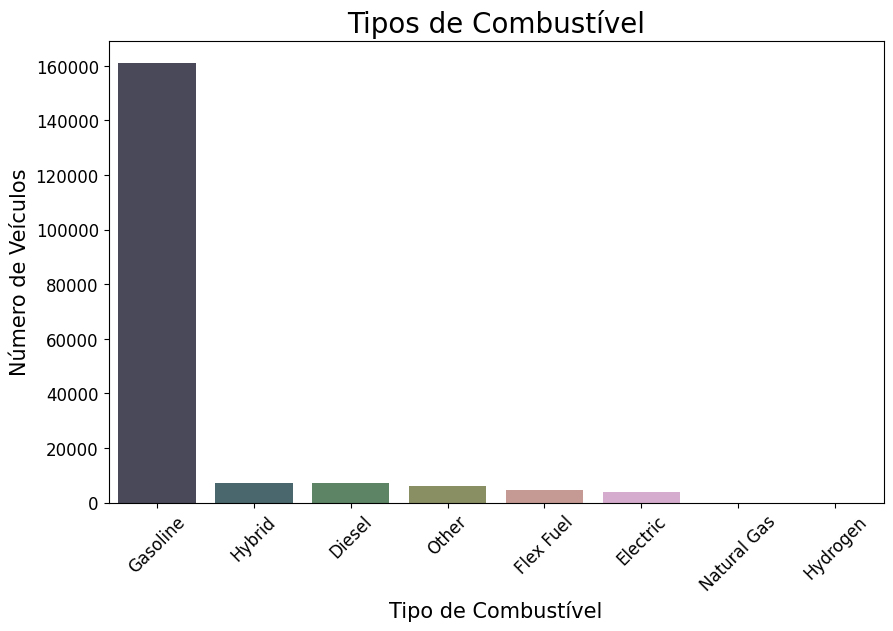

In [1423]:
fuel_type_counts = cars_df['fuel_type'].value_counts()

# Paleta de cores
rainbow_palette = sns.color_palette("cubehelix", len(fuel_type_counts))

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=fuel_type_counts.index, y=fuel_type_counts.values, hue=fuel_type_counts.index, palette=rainbow_palette, alpha=0.8)
plt.title('Tipos de Combustível', fontsize=20)
plt.ylabel('Número de Veículos', fontsize=15)
plt.xlabel('Tipo de Combustível', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Temos também uma quantidade muito grande de carros movidos apenas a gasolina. Essa disparidade pode atrapalhar as previsões.

## 2.10 Coluna ```mpg```

In [1424]:
cars_df['mpg'].value_counts()

mpg
19-26      4007
18-25      3919
17-25      3589
20-27      3376
16-23      2893
           ... 
20-0.0        1
24-35.0       1
32-35         1
10            1
40-40         1
Name: count, Length: 637, dtype: int64

Vejamos quantos ```NaN``` há neste dataframe:

In [1425]:
cars_df['mpg'].isna().sum()

35731

A estratégia que escolhi para lidar com essa coluna envolveu, primeiramente, transformá-la em númerica, usando as médias dos intervalos representados (ex. as linhas com valor 19-26 ficariam com a média entre os dois números, ou seja, 22,5). Essa medida, no entanto, não foi o suficiente, pois essa coluna possui duas problemáticas: além de ter muitos valores ```NaN```, também possui muitas linhas com valor 0 de milhas por galão, o que obviamente os torna valores inválidos. 

A primeira solução pensada para esses valores nulos foi preencher essas linhas com a média de mpg do ano do carro. Não deu certo. Todos os anos entre 1923 e 1991 permaneceram ou com ```NaN```, ou com o valor zero, ou ficaram com uma média irreal até para os carros menos ecológicos (ex. 2mpg).

Assim, a estratégia escolhida foi pesquisar a média de mpg dos carros ao longo dos anos e inserir esses dados no dataframe. O estudo usado como referência para esse fim chama-se "On-Road Fuel Economy of Vehicles in the United States: 1923-2015" de Michael Sivak e Brandon Schoettle, publicado pela University of Michigan.


![cars mpg plot](cars-mpg.png)


De acordo com o texto do estudo: os carros foram de 15.3mpg em 1936 a 13.4mpg em 1973, e então subiram para 21.2 em 1991. Vamos seguir essa lógica.

Vamos começar tratando os anos em que temos informações sobre o mpg. Pensei em desfazer a string usando ```split``` e então calcular a média entre os valores. E assim, deixar o valor da média na coluna.

In [1426]:
def convert_to_numeric(mpg):
    if isinstance(mpg, str):
        if '-' in mpg:
            parts = mpg.split('-')
            if len(parts) == 2:
                try:
                    start, end = float(parts[0]), float(parts[1])
                    return (start + end) / 2
                except ValueError:
                    return np.nan  
        try:
            return float(mpg)
        except ValueError:
            return np.nan 
    try:
        return float(mpg) # retorna o número caso ele já seja um float
    except ValueError:
        return np.nan

cars_df['mpg_numeric'] = cars_df['mpg'].apply(convert_to_numeric)


Agora é necessário lidar com os valores faltantes. Para calcular a média de mpg por ano, precisamos selecionar apenas as linhas com valores não nulos, para que a média não fique enviesada.

In [1427]:
mpg_df = cars_df[(cars_df['mpg_numeric'] != 0.00) & (~cars_df['mpg_numeric'].isna())]
mean_mpg_per_year = mpg_df.groupby('year')['mpg_numeric'].mean()
mean_mpg_per_year


year
1984   16.00
1986   14.75
1987   19.00
1988   21.00
1989   15.67
1991   15.67
1992   18.20
1993   19.04
1994   18.49
1995   19.44
1996   20.19
1997   19.64
1998   20.85
1999   20.40
2000   19.89
2001   21.14
2002   20.29
2003   20.66
2004   20.69
2005   21.61
2006   22.08
2007   22.73
2008   20.85
2009   21.90
2010   22.95
2011   22.32
2012   24.12
2013   24.83
2014   24.80
2015   25.01
2016   24.79
2017   24.63
2018   24.89
2019   25.16
2020   25.48
2021   25.36
2022   25.25
2023   24.91
Name: mpg_numeric, dtype: float64

In [1428]:
manual_means = {
    range(1923, 1941): 15.3,
    range(1941, 1951): 15.0,
    range(1951, 1963): 14.5,
    range(1963, 1966): 14.0,
    range(1966, 1974): 13.4,
    range(1974, 1976): 14.0,
    range(1976, 1979): 14.5,
    range(1979, 1981): 15.0,
    range(1981, 1986): 17.0,
    1990: 15.67
}

In [1429]:
def get_manual_mean(year):
    for year_range, mean in manual_means.items():
        if isinstance(year_range, range):
            if year in year_range:
                return mean
        else:
            if year == year_range:
                return mean
    return None  # Se o ano não estiver nas médias manuais

def replace_with_mean(row, mean_mpg_per_year):
    if row['mpg_numeric'] == 0.00 or pd.isna(row['mpg_numeric']):
        manual_mean = get_manual_mean(row['year'])
        if manual_mean is not None:
            return manual_mean
        return mean_mpg_per_year.get(row['year'], row['mpg_numeric'])  # Manter o valor original se não houver média
    else:
        return row['mpg_numeric']
cars_df['mpg_numeric'] = cars_df.apply(replace_with_mean, axis=1, mean_mpg_per_year=mean_mpg_per_year)

Agora podemos confirmar se há algum dado nulo na coluna ```mpg_numeric```:

In [1430]:
cars_df[(cars_df['mpg_numeric'] == 0.00) & (cars_df['mpg_numeric'].isna())]

,manufacturer,year,mileage,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,...,price_drop,price,model,engine_size_L,cylinders,turbo,transmission,drivetrain,fuel_type,mpg_numeric


In [1431]:
cars_df.groupby('year')['mpg_numeric'].mean()

year
1923   15.30
1926   15.30
1928   15.30
1929   15.30
1930   15.30
1931   15.30
1932   15.30
1937   15.30
1939   15.30
1940   15.30
1941   15.00
1942   15.00
1946   15.00
1947   15.00
1948   15.00
1949   15.00
1950   15.00
1951   14.50
1952   14.50
1953   14.50
1954   14.50
1955   14.50
1956   14.50
1957   14.50
1958   14.50
1959   14.50
1960   14.50
1961   14.50
1962   14.50
1963   14.00
1964   14.00
1965   14.00
1966   13.40
1967   13.40
1968   13.40
1969   13.40
1970   13.40
1971   13.40
1972   13.40
1973   13.40
1974   14.00
1975   14.00
1976   14.50
1977   14.50
1978   14.50
1979   15.00
1980   15.00
1981   17.00
1982   17.00
1983   17.00
1984   16.94
1985   17.00
1986   14.75
1987   19.00
1988   21.00
1989   15.67
1990   15.67
1991   15.67
1992   18.20
1993   19.04
1994   18.49
1995   19.44
1996   20.19
1997   19.64
1998   20.85
1999   20.40
2000   19.89
2001   21.14
2002   20.29
2003   20.66
2004   20.69
2005   21.61
2006   22.08
2007   22.73
2008   20.85
2009   21.90
2010   

E agora podemos remover a ```mpg``` orginal e substituí-la pela nova coluna:

In [1432]:
cars_df.drop('mpg', axis=1, inplace=True)

cars_df.rename(columns={'mpg_numeric': 'mpg'}, inplace=True)

In [1433]:
cars_df.head()

,manufacturer,year,mileage,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,...,price_drop,price,model,engine_size_L,cylinders,turbo,transmission,drivetrain,fuel_type,mpg
456056,Land Rover,2018,33585.00,Santorini Black,Ebony,0.00,1.00,0.00,Schaumburg Ford,4.10,...,500.00,53950.00,Range Rover Sport HSE Dynamic,3.12,16.00,0.00,Automatic,4WD,Gasoline,20.00
563956,Nissan,2017,63009.00,Black,Almond,0.00,0.00,1.00,World Auto Inc.,2.30,...,NaN,27885.00,Armada SL,5.60,32.00,0.00,Automatic,RWD,Gasoline,16.50
724184,Toyota,2018,51316.00,SILVER,Brown/Black,0.00,NaN,1.00,CAL Cars,4.40,...,1000.00,46995.00,Tundra 1794,5.70,16.00,0.00,Automatic,4WD,Gasoline,15.00
706657,Toyota,2015,89444.00,Cosmic Gray Mica,Light Gray,0.00,1.00,1.00,Scanlon Lexus,4.70,...,482.00,17987.00,Avalon XLE,3.50,24.00,0.00,Automatic,FWD,Gasoline,26.00
551197,Mercedes-Benz,2023,2191.00,2191,Tartufo Brown,0.00,1.00,1.00,Lupient Buick GMC,4.50,...,5969.00,96648.00,GLS 450 4MATIC,3.00,24.00,1.00,Automatic,AWD,Gasoline,24.91


In [1434]:
cars_df['mpg'].value_counts()

mpg
23.50     7873
25.25     7773
21.50     7028
22.50     6662
24.50     6551
          ... 
73.50        1
4.50         1
102.00       1
5.00         1
26.25        1
Name: count, Length: 158, dtype: int64

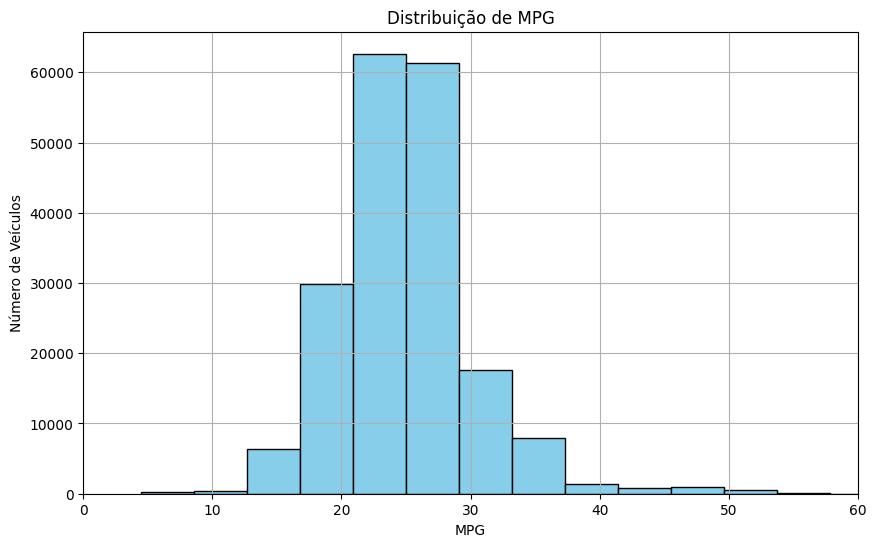

In [1435]:
mpg_values = cars_df['mpg']  

plt.figure(figsize=(10, 6))
plt.hist(mpg_values, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição de MPG')
plt.xlabel('MPG')
plt.ylabel('Número de Veículos')
plt.grid(True)
plt.xlim(0, 60)
plt.show()

Podemos notar que a distribuição dessa coluna é normal, o que pode nos ajudar a prever os preços dos carros.

## 2.11 Colunas ```exterior_color```

In [1436]:
cars_df['exterior_color'].value_counts()

exterior_color
Black                             15072
White                             12869
Gray                               7503
Silver                             6053
Blue                               4359
                                  ...  
WHITE/BLACK                           1
Satin Metal Metallic                  1
Pastel Green                          1
Header Orange                         1
Pueblo Gold Clearcoat Metallic        1
Name: count, Length: 4652, dtype: int64

Precisamos diminuir a quantidade de valores únicos aqui. Vamos começar definindo uma função para lidar com os valores da coluna ```exterior_color```: 

In [1437]:
def classify_exterior_color(exterior_color):
    patterns = {
        'Black': r'\b(Black|Ebony|Night|Caviar|Obsidian|Sapphire|BLK|Blac|Rhino|Asphalt|BL|Blackberry)\b',
        'White': r'\b(White|Pearl|Ice|Fresh Powder|Chalk|Rift|Ivory|Iceberg)\b',
        'Gray': r'\b(Gray|Granite|Quartzite|SELENITE|Smoky|Ash|Carbon|MANGANESE|moonstone|Smoke|Cement|Mystic Jade|Steel|Grey|Graphite|Magnetic|Gun|Shadow|Graystone|Pepperdust|Quartz|Iridium|Pewter|Titanium|Charcoal|Tungsten|Lead Foot|Gunmetal|Manhattan Noir)\b',
        'Green': r'\b(Green|Lunar Rock|Jade|Cactus|Olive|Anvil|Moss|Emerald|Sage|Tank|Greenstone|Hypergreen|Lime|Hunter|Mojito|Rainforest|Cypress)\b',
        'Red': r'\b(Red|Maroon|Cherry|Deep Amethyst|Mica|Mahogany|Crimson|Currant|Snazzberry|Ametrin|Velvet|Rosewood|Redline|Scarlet|Burgundy|Infrared|Cinnabar|Sinamon|Torred|Cordovan|Cinnamon|Redfire|Merlot|Rouge|Canyon|Redwood|Ruby|Molten|Garnet|Bordeaux)\b',
        'Blue': r'\b(Blue|Blueprint|DKBLUE|Deep|Water|Azure|Wave|Slate|Blu|Turquoise|Chief Clearcoat|Sky|Denim|Bikini|Teal|Caribbean|Moon Dust|Moondust|Bluestone|Cerulean|AREA 51|Sea|Lunar|Aqua|Nightfall|CELESTITE|Celistite|Frostbite|Storm|Ageha|Atlantic)\b',
        'Orange': r'\b(Orange|Sunset|Mango|Oran|Vitamin C|Lava|Copperhead|Orangeburst)\b',
        'Yellow': r'\b(Yellow|High Velocity|Birch|Hellayella|Alien II)\b',
        'Beige': r'\b(Beige|Sand|Tan|Cream|Sandy|Gobi|Baja|Marshmallow|Khaki|Dune|Quicksand)\b',
        'Brown': r'\b(Brown|espresso|Mocha|Copper|Chocolate|Smoked Mesquite|Bronze|Amber|Caribou|Coffee|Java|Autumn Shimmer)\b',
        'Gold': r'\b(Gold|GLD|Palladium|Savannah|Aruba|Sandstone|Cashmere|Sunstone)\b',
        'Silver': r'\b(Silver|Radiance|Nickel|Quicksilver|Aluminum|Platinum|Metal|Silverstone|Mercury|Billet|Frost|SV|Ceramic|Glacier)\b',
        'Purple': r'\b(Purple|Plum|Hellraisin|Mulberry|Violet|Sangria|Midnight Amethyst)\b',
        'Light Brown': r'\b(Mojave|Brownstone|Pyrite Mica|Coppertino|Bronzemist|Champagne|Gondwana|Stone)\b',
    }
    
    if pd.isnull(exterior_color): 
        return 'Other' 
    
    for category, pattern in patterns.items():
        if re.search(pattern, exterior_color, re.IGNORECASE):
            return category
    
    return 'Other' 

cars_df['category'] = cars_df['exterior_color'].apply(classify_exterior_color)
cars_df['category'].value_counts()


category
White          52927
Black          42159
Gray           32158
Silver         19576
Blue           16579
Red            15853
Other           3755
Green           2102
Brown           1605
Orange          1089
Beige            906
Gold             788
Yellow           572
Purple           237
Light Brown      214
Name: count, dtype: int64

In [1438]:
cars_df.drop('exterior_color', axis=1, inplace=True)

cars_df.rename(columns={'category': 'exterior_color'}, inplace=True)
cars_df

,manufacturer,year,mileage,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,...,price,model,engine_size_L,cylinders,turbo,transmission,drivetrain,fuel_type,mpg,exterior_color
456056,Land Rover,2018,33585.00,Ebony,0.00,1.00,0.00,Schaumburg Ford,4.10,4.00,...,53950.00,Range Rover Sport HSE Dynamic,3.12,16.00,0.00,Automatic,4WD,Gasoline,20.00,Black
563956,Nissan,2017,63009.00,Almond,0.00,0.00,1.00,World Auto Inc.,2.30,4.70,...,27885.00,Armada SL,5.60,32.00,0.00,Automatic,RWD,Gasoline,16.50,Black
724184,Toyota,2018,51316.00,Brown/Black,0.00,NaN,1.00,CAL Cars,4.40,4.80,...,46995.00,Tundra 1794,5.70,16.00,0.00,Automatic,4WD,Gasoline,15.00,Silver
706657,Toyota,2015,89444.00,Light Gray,0.00,1.00,1.00,Scanlon Lexus,4.70,4.70,...,17987.00,Avalon XLE,3.50,24.00,0.00,Automatic,FWD,Gasoline,26.00,Gray
551197,Mercedes-Benz,2023,2191.00,Tartufo Brown,0.00,1.00,1.00,Lupient Buick GMC,4.50,NaN,...,96648.00,GLS 450 4MATIC,3.00,24.00,1.00,Automatic,AWD,Gasoline,24.91,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340527,Hyundai,2017,52900.00,Gray,0.00,0.00,0.00,Bommarito Nissan Hazelwood,4.80,4.70,...,16995.00,Elantra SE,3.12,16.00,0.00,Automatic,FWD,Gasoline,33.50,Blue
618501,RAM,2015,45195.00,Gray,0.00,0.00,1.00,Woody's Dodge Jeep Chrysler RAM,4.60,4.10,...,54870.00,ProMaster 1500 Low Roof,3.00,16.00,1.00,Automatic,FWD,Diesel,25.01,White
673837,Toyota,2013,160000.00,Beige,0.00,1.00,1.00,Trade Guru,3.40,4.70,...,13991.00,Highlander,3.50,24.00,0.00,Automatic,AWD,Gasoline,19.50,White
291906,GMC,2016,102462.00,Jet Black,0.00,0.00,1.00,Murray Ford Superstore,4.80,4.70,...,32777.00,Yukon XL Denali,6.20,16.00,0.00,Automatic,RWD,Gasoline,18.50,Black


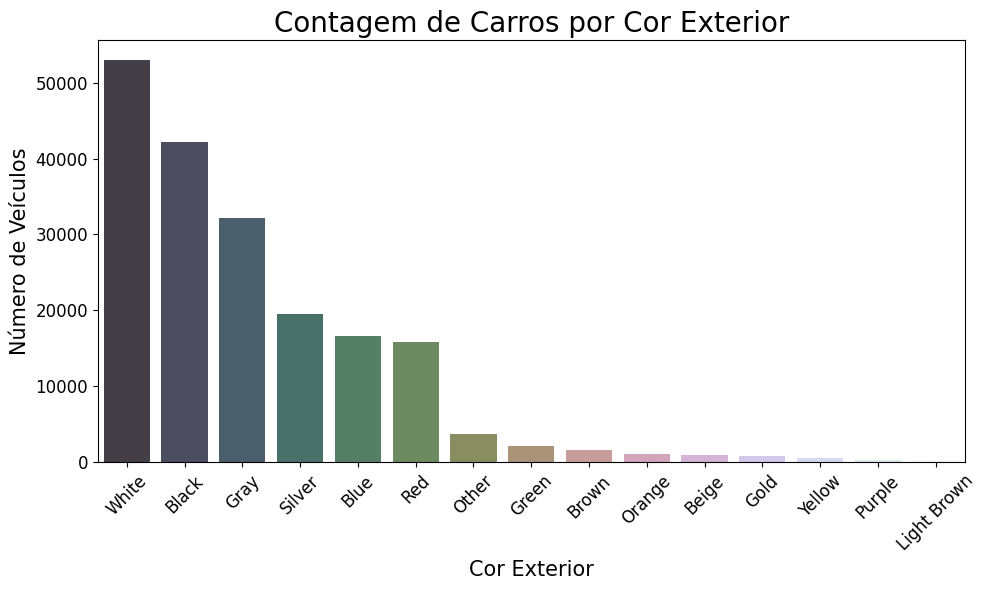

In [1442]:
cor_contagens = cars_df['exterior_color'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=cor_contagens.index, y=cor_contagens.values, hue=cor_contagens.index, palette="cubehelix", alpha=0.8)
plt.title('Contagem de Carros por Cor Exterior', fontsize=20)
plt.ylabel('Número de Veículos', fontsize=15)
plt.xlabel('Cor Exterior', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

## 2.12 Coluna ```interior_color```

O tratamento para esta coluna será o mesmo que o para a ```exterior_color```, só não usei a mesma função para ambas por uma questão de clareza.

In [1443]:
cars_df['interior_color'].value_counts()

interior_color
Black                        71861
Gray                         12412
Jet Black                    11483
Ebony                         9506
Charcoal                      6615
                             ...  
Almond w/Ivory Headlining        1
Black/Platinum Gray              1
Inspiration Yellow               1
Blond - U710                     1
Marble Grey/Black                1
Name: count, Length: 2664, dtype: int64

In [1444]:
def classify_interior_color(interior_color):
    patterns = {
        'Black': r'\b(Black|Dark|Obsidian|Adobe|Carbon|Midnight|Jet|Anthracite|Ebony|Charcoal|Ebony|Onyx|EA20|Graphite|Graystone|Rock)\b',
        'Gray': r'\b(Gray|Birch|Grey|Charcoal|Tungsten|Sea salt|Graphite|Greystone|Slate|Silver|Platinum|Silverstone|Moonstone|Ash|Cement|Platinum|Graphite|Ash|Light Gray|Steel|Pewter|Cement|Shale|Taupe|Stone|Titanium)\b',
        'Beige': r'\b(Beige|Parchment|Blonde|Latte|Neutral|Cardamom|Champagne|Sandstorm|Cornsilk|Khaki|Oyster|Cirrus|Desert|Ceramic|Ecru|Light Frost|Oyster|Wheat|Sand|Cream|Ivory|Macchiato Beige|Medium Light Stone|Cappuccino|Sandstone|Almond|Acorn|Blond|Cream|Cashmere|Dune|Light Frost|Ivory White|Camel|Bisque|Medium Light Ceramic|Flaxen|Chateau|Light Oyster|Light Putty|Macadamia|Heritage Tan|Toffee|Light Slate|Cirrus)\b',
        'Brown': r'\b(Brown|Tan|Terra|Cafe|Macchiato|Oak|Tupelo|Truffle|Walnut|Caraway|Sepia|Pecan|Teak|Brownstone|Cognac|Saddle|Mocha|Cocoa|Choccachino|Earth|Espresso|Dark Walnut|Java|Caramel|Amber|Coffee|Chestnut|Medium Dark Slate|Gideon|Maple Sugar|Medium Flint|Russet|Nutmeg|Tartufo|Deep Chestnut|Auburn|Amarone|Roast|Cinnamon|Terracotta|Ginger|Brandy|Dark Auburn|Hazelnut|Kalahari)\b',
        'Red': r'\b(Red|Ruby Red|Rioja Red|Burgundy|Redwood|Maroon|Mahogany|Sangria)\b',
        'Blue': r'\b(Blue|Navy Pier|Navy|Indigo|Turquoise)\b',
        'White': r'\b(White)\b',
        'Green': r'\b(Green|Ivy|Deep Cypress|Sage)\b',
        'Orange': r'\b(Orange)\b',
    }
    
    if pd.isnull(interior_color): 
        return 'Other' 
    
    for category, pattern in patterns.items():
        if re.search(pattern, interior_color, re.IGNORECASE):
            return category
    
    return 'Other' 

cars_df['category'] = cars_df['interior_color'].apply(classify_interior_color)
cars_df['category'].value_counts()

category
Black     125680
Gray       21153
Other      16236
Beige      15563
Brown       8416
Red         2288
White        537
Blue         498
Green         95
Orange        54
Name: count, dtype: int64

In [1445]:
cars_df.drop('interior_color', axis=1, inplace=True)

cars_df.rename(columns={'category': 'interior_color'}, inplace=True)
cars_df

,manufacturer,year,mileage,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,...,model,engine_size_L,cylinders,turbo,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color
456056,Land Rover,2018,33585.00,0.00,1.00,0.00,Schaumburg Ford,4.10,4.00,45.00,...,Range Rover Sport HSE Dynamic,3.12,16.00,0.00,Automatic,4WD,Gasoline,20.00,Black,Black
563956,Nissan,2017,63009.00,0.00,0.00,1.00,World Auto Inc.,2.30,4.70,78.00,...,Armada SL,5.60,32.00,0.00,Automatic,RWD,Gasoline,16.50,Black,Beige
724184,Toyota,2018,51316.00,0.00,NaN,1.00,CAL Cars,4.40,4.80,199.00,...,Tundra 1794,5.70,16.00,0.00,Automatic,4WD,Gasoline,15.00,Silver,Black
706657,Toyota,2015,89444.00,0.00,1.00,1.00,Scanlon Lexus,4.70,4.70,74.00,...,Avalon XLE,3.50,24.00,0.00,Automatic,FWD,Gasoline,26.00,Gray,Gray
551197,Mercedes-Benz,2023,2191.00,0.00,1.00,1.00,Lupient Buick GMC,4.50,NaN,0.00,...,GLS 450 4MATIC,3.00,24.00,1.00,Automatic,AWD,Gasoline,24.91,Other,Brown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340527,Hyundai,2017,52900.00,0.00,0.00,0.00,Bommarito Nissan Hazelwood,4.80,4.70,640.00,...,Elantra SE,3.12,16.00,0.00,Automatic,FWD,Gasoline,33.50,Blue,Gray
618501,RAM,2015,45195.00,0.00,0.00,1.00,Woody's Dodge Jeep Chrysler RAM,4.60,4.10,5.00,...,ProMaster 1500 Low Roof,3.00,16.00,1.00,Automatic,FWD,Diesel,25.01,White,Gray
673837,Toyota,2013,160000.00,0.00,1.00,1.00,Trade Guru,3.40,4.70,140.00,...,Highlander,3.50,24.00,0.00,Automatic,AWD,Gasoline,19.50,White,Beige
291906,GMC,2016,102462.00,0.00,0.00,1.00,Murray Ford Superstore,4.80,4.70,26.00,...,Yukon XL Denali,6.20,16.00,0.00,Automatic,RWD,Gasoline,18.50,Black,Black


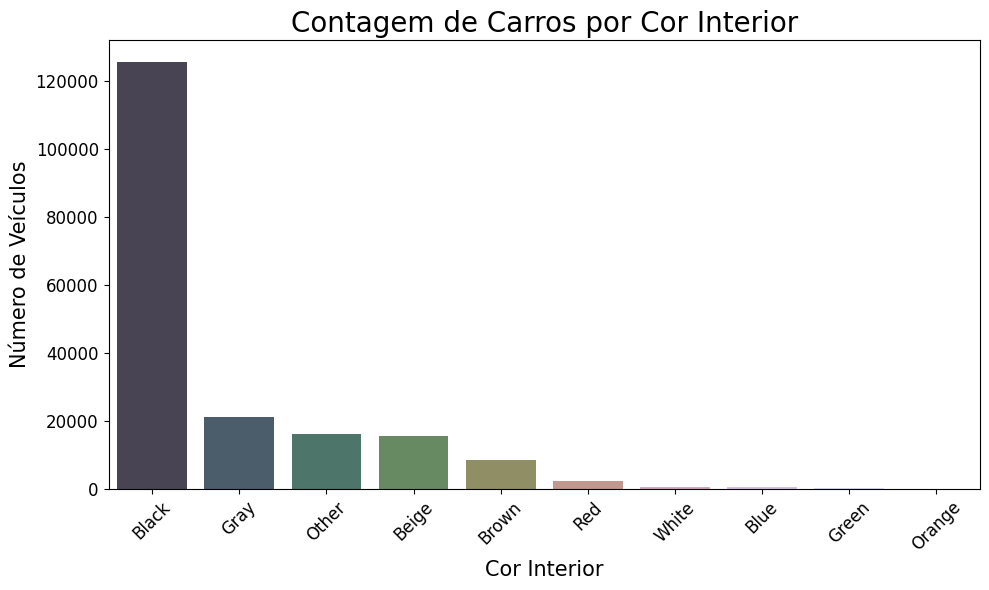

In [1446]:
cor_int_contagens = cars_df['interior_color'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=cor_int_contagens.index, y=cor_int_contagens.values, hue=cor_int_contagens.index, palette="cubehelix", alpha=0.8)
plt.title('Contagem de Carros por Cor Interior', fontsize=20)
plt.ylabel('Número de Veículos', fontsize=15)
plt.xlabel('Cor Interior', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

Embora a distribuição 

## 2.13 Coluna ```accidents_or_damage```

In [1447]:
cars_df['accidents_or_damage'].value_counts()

accidents_or_damage
0.00    142103
1.00     42368
Name: count, dtype: int64

In [1448]:
cars_df['accidents_or_damage'].isna().sum()

6049

Não vejo muita opção nesse caso, a não ser considerar como zero os valores nulos. O primeiro e principal motivo é que a própria amostra já sugere que há maiores chances de um carro nesse dataframe não ter sofrido acidentes. Segundo, porque é fato corriqueiro que, ao preencher cadastros, as pessoas apenas preencham valores que saiam da normalidade. Assim, é mais provável que quem preencheu as informações tenha deixado o campo em branco, pois de fato não havia anotação a ser feita. E terceiro, por uma razão operacional: é também bastante compreensível que algum computador tenha entendido o zero como nulo. Assim, vamos substituir os valores ```NaN``` por 0.

In [1449]:
cars_df['accidents_or_damage'] = cars_df['accidents_or_damage'].fillna(0)

In [1450]:
cars_df['accidents_or_damage'].value_counts()

accidents_or_damage
0.00    148152
1.00     42368
Name: count, dtype: int64

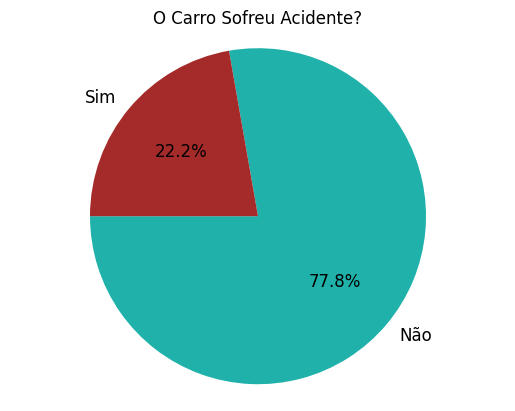

In [1491]:
accidents_counts = cars_df['accidents_or_damage'].value_counts()
plt.pie(accidents_counts, labels=['Não', 'Sim'], colors=['lightseagreen', 'brown'], autopct='%1.1f%%', startangle=180, textprops={'fontsize': 12})
plt.axis('equal')
plt.title('O Carro Sofreu Acidente?')
plt.show()

## 2.14 Coluna ```one_owner```

In [1458]:
cars_df['one_owner'].value_counts()

one_owner
1.00    102619
0.00     80053
Name: count, dtype: int64

In [1459]:
cars_df['one_owner'].isna().sum()

7848

Diante da grande quantidade de valores nulos e o fato de que agora a amostra maior é a de número um, achei mais sensato dividir o preenchimento dos valores nulos de forma a manter a proporção da amostra.

In [1460]:
proportions = cars_df['one_owner'].value_counts(normalize=True)
cars_df['one_owner_proportional'] = cars_df['one_owner'].apply(
    lambda x: np.random.choice([0, 1], p=[proportions[0], proportions[1]]) if pd.isna(x) else x
)

In [1461]:
cars_df['one_owner_proportional'].isna().sum()

0

E apenas para demonstrar que a proporção continua a mesma, abaixo podemos ver os plots com as proporções antes e depois do processamento.

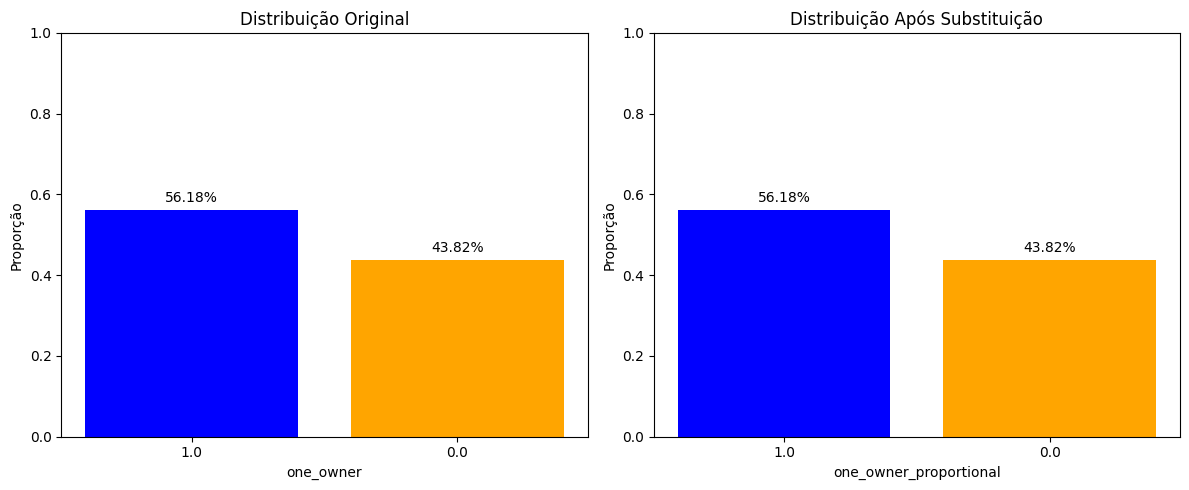

In [1462]:
new_distribution = cars_df['one_owner_proportional'].value_counts(normalize=True)

# Plotando as distribuições
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

original_distribution = proportions
ax[0].bar(original_distribution.index.astype(str), original_distribution, color=['blue', 'orange'])
ax[0].set_title('Distribuição Original')
ax[0].set_xlabel('one_owner')
ax[0].set_ylabel('Proporção')
ax[0].set_ylim(0, 1)
for i, v in enumerate(original_distribution):
    ax[0].text(i, v + 0.02, f'{v:.2%}', ha='center')

ax[1].bar(new_distribution.index.astype(str), new_distribution, color=['blue', 'orange'])
ax[1].set_title('Distribuição Após Substituição')
ax[1].set_xlabel('one_owner_proportional')
ax[1].set_ylabel('Proporção')
ax[1].set_ylim(0, 1)
for i, v in enumerate(new_distribution):
    ax[1].text(i, v + 0.02, f'{v:.2%}', ha='center')

plt.tight_layout()
plt.show()

In [1463]:
# agora podemos deletar one_owner

cars_df.drop('one_owner', axis=1, inplace=True)

cars_df.rename(columns={'one_owner_proportional': 'one_owner'}, inplace=True)
cars_df

,manufacturer,year,mileage,accidents_or_damage,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,...,engine_size_L,cylinders,turbo,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,one_owner
456056,Land Rover,2018,33585.00,0.00,0.00,Schaumburg Ford,4.10,4.00,45.00,500.00,...,3.12,16.00,0.00,Automatic,4WD,Gasoline,20.00,Black,Black,1.00
563956,Nissan,2017,63009.00,0.00,1.00,World Auto Inc.,2.30,4.70,78.00,NaN,...,5.60,32.00,0.00,Automatic,RWD,Gasoline,16.50,Black,Beige,0.00
724184,Toyota,2018,51316.00,0.00,1.00,CAL Cars,4.40,4.80,199.00,1000.00,...,5.70,16.00,0.00,Automatic,4WD,Gasoline,15.00,Silver,Black,0.00
706657,Toyota,2015,89444.00,0.00,1.00,Scanlon Lexus,4.70,4.70,74.00,482.00,...,3.50,24.00,0.00,Automatic,FWD,Gasoline,26.00,Gray,Gray,1.00
551197,Mercedes-Benz,2023,2191.00,0.00,1.00,Lupient Buick GMC,4.50,NaN,0.00,5969.00,...,3.00,24.00,1.00,Automatic,AWD,Gasoline,24.91,Other,Brown,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340527,Hyundai,2017,52900.00,0.00,0.00,Bommarito Nissan Hazelwood,4.80,4.70,640.00,NaN,...,3.12,16.00,0.00,Automatic,FWD,Gasoline,33.50,Blue,Gray,0.00
618501,RAM,2015,45195.00,0.00,1.00,Woody's Dodge Jeep Chrysler RAM,4.60,4.10,5.00,NaN,...,3.00,16.00,1.00,Automatic,FWD,Diesel,25.01,White,Gray,0.00
673837,Toyota,2013,160000.00,0.00,1.00,Trade Guru,3.40,4.70,140.00,NaN,...,3.50,24.00,0.00,Automatic,AWD,Gasoline,19.50,White,Beige,1.00
291906,GMC,2016,102462.00,0.00,1.00,Murray Ford Superstore,4.80,4.70,26.00,213.00,...,6.20,16.00,0.00,Automatic,RWD,Gasoline,18.50,Black,Black,0.00


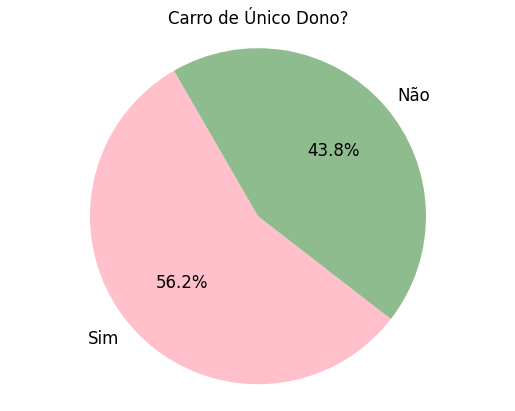

In [1490]:
owner_counts = cars_df['one_owner'].value_counts()
plt.pie(owner_counts, labels=['Sim', 'Não'], colors=['pink', 'darkseagreen'], autopct='%1.1f%%', startangle=120, textprops={'fontsize': 12})
plt.axis('equal')
plt.title('Carro de Único Dono?')
plt.show()

## 2.15 Coluna ```personal_use_only```

In [1481]:
cars_df['personal_use_only'].value_counts()

personal_use_only
1.00    121215
0.00     63107
Name: count, dtype: int64

In [1482]:
cars_df['personal_use_only'].isna().sum()

6198

Vamos usar a mesma estratégia usada na última coluna.

In [1483]:
proportions_personal_use = cars_df['personal_use_only'].value_counts(normalize=True)
cars_df['puo_proportional'] = cars_df['personal_use_only'].apply(
    lambda x: np.random.choice([0, 1], p=[proportions_personal_use[0], proportions_personal_use[1]]) if pd.isna(x) else x
)

In [1484]:
cars_df['puo_proportional'].isna().sum()

0

E apenas para confirmar a correspondência de proporções antes e depois da substituição dos valores nulos:

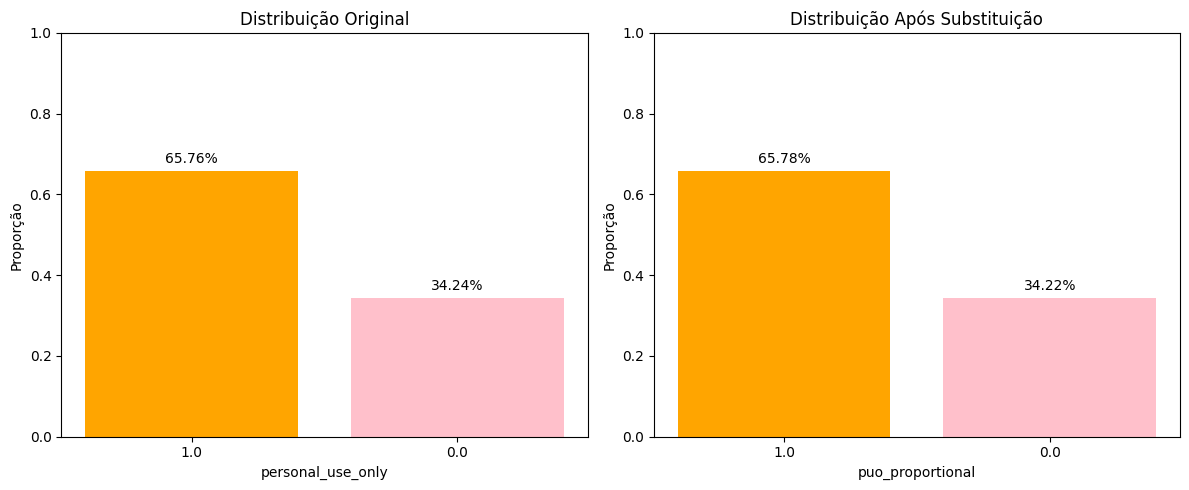

In [1485]:
new_distribution2 = cars_df['puo_proportional'].value_counts(normalize=True)

# Plotando as distribuições
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

original_distribution2 = proportions_personal_use
ax[0].bar(original_distribution2.index.astype(str), original_distribution2, color=['orange', 'pink'])
ax[0].set_title('Distribuição Original')
ax[0].set_xlabel('personal_use_only')
ax[0].set_ylabel('Proporção')
ax[0].set_ylim(0, 1)
for i, v in enumerate(original_distribution2):
    ax[0].text(i, v + 0.02, f'{v:.2%}', ha='center')

ax[1].bar(new_distribution2.index.astype(str), new_distribution2, color=['orange', 'pink'])
ax[1].set_title('Distribuição Após Substituição')
ax[1].set_xlabel('puo_proportional')
ax[1].set_ylabel('Proporção')
ax[1].set_ylim(0, 1)
for i, v in enumerate(new_distribution2):
    ax[1].text(i, v + 0.02, f'{v:.2%}', ha='center')

plt.tight_layout()
plt.show()

In [1486]:
# deletando personal_use_only

cars_df.drop('personal_use_only', axis=1, inplace=True)

cars_df.rename(columns={'puo_proportional': 'personal_use_only'}, inplace=True)
cars_df

,manufacturer,year,mileage,accidents_or_damage,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price,...,cylinders,turbo,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,one_owner,personal_use_only
456056,Land Rover,2018,33585.00,0.00,Schaumburg Ford,4.10,4.00,45.00,500.00,53950.00,...,16.00,0.00,Automatic,4WD,Gasoline,20.00,Black,Black,1.00,0.00
563956,Nissan,2017,63009.00,0.00,World Auto Inc.,2.30,4.70,78.00,NaN,27885.00,...,32.00,0.00,Automatic,RWD,Gasoline,16.50,Black,Beige,0.00,1.00
724184,Toyota,2018,51316.00,0.00,CAL Cars,4.40,4.80,199.00,1000.00,46995.00,...,16.00,0.00,Automatic,4WD,Gasoline,15.00,Silver,Black,0.00,1.00
706657,Toyota,2015,89444.00,0.00,Scanlon Lexus,4.70,4.70,74.00,482.00,17987.00,...,24.00,0.00,Automatic,FWD,Gasoline,26.00,Gray,Gray,1.00,1.00
551197,Mercedes-Benz,2023,2191.00,0.00,Lupient Buick GMC,4.50,NaN,0.00,5969.00,96648.00,...,24.00,1.00,Automatic,AWD,Gasoline,24.91,Other,Brown,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340527,Hyundai,2017,52900.00,0.00,Bommarito Nissan Hazelwood,4.80,4.70,640.00,NaN,16995.00,...,16.00,0.00,Automatic,FWD,Gasoline,33.50,Blue,Gray,0.00,0.00
618501,RAM,2015,45195.00,0.00,Woody's Dodge Jeep Chrysler RAM,4.60,4.10,5.00,NaN,54870.00,...,16.00,1.00,Automatic,FWD,Diesel,25.01,White,Gray,0.00,1.00
673837,Toyota,2013,160000.00,0.00,Trade Guru,3.40,4.70,140.00,NaN,13991.00,...,24.00,0.00,Automatic,AWD,Gasoline,19.50,White,Beige,1.00,1.00
291906,GMC,2016,102462.00,0.00,Murray Ford Superstore,4.80,4.70,26.00,213.00,32777.00,...,16.00,0.00,Automatic,RWD,Gasoline,18.50,Black,Black,0.00,1.00


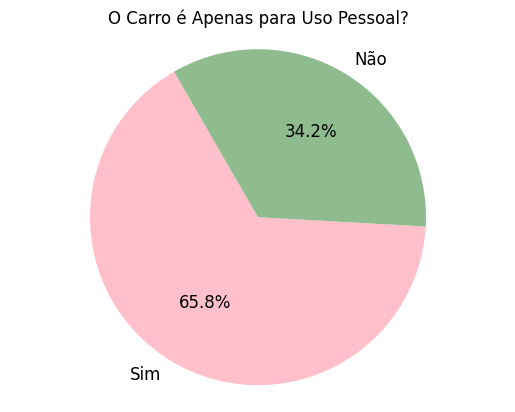

In [1494]:
personal_use_counts = cars_df['personal_use_only'].value_counts()
plt.pie(personal_use_counts, labels=['Sim', 'Não'], colors=['pink', 'darkseagreen'], autopct='%1.1f%%', startangle=120, textprops={'fontsize': 12})
plt.axis('equal')
plt.title('O Carro é Apenas para Uso Pessoal?')
plt.show()

## 2.16 Colunas ```seller_name``` e ```seller_rating```

Certamente o nome do vendedor não influencia para nada no preço da venda dos carros. Assim, essa coluna deverá ser apagada.

In [1495]:
cars_df.drop('seller_name', axis=1, inplace=True)

Resta saber se há relação entre a avaliação do vendedor e o preço de venda.

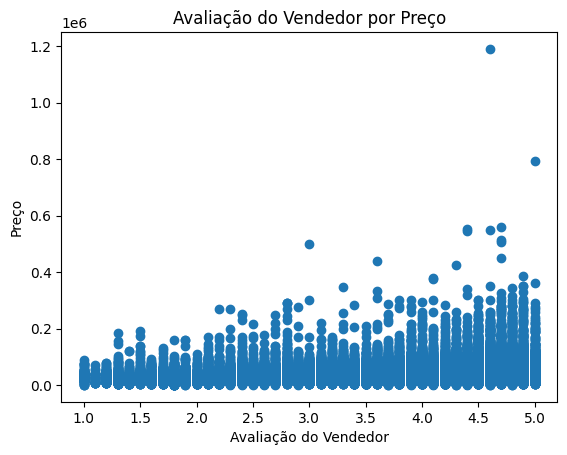

In [1499]:
plt.scatter(cars_df['seller_rating'], cars_df['price'])
plt.title('Avaliação do Vendedor por Preço')
plt.ylabel('Preço')
plt.xlabel('Avaliação do Vendedor')
plt.show()

Parece que há relação! Quanto melhor a avaliação, maiores as chances de vender por um preço mais alto.

In [1504]:
cars_df['seller_rating'].isna().sum()

53441

Vamos substituir os valores faltantes pela média.

In [1505]:
mean_seller_rating = cars_df['seller_rating'].mean()
cars_df['seller_rating'].fillna(mean_seller_rating, inplace=True)

In [1507]:
mean_seller_rating

4.1604797233711945

Agora com a média, a relação entre avaliação do vendedor e preço fica ainda maior.

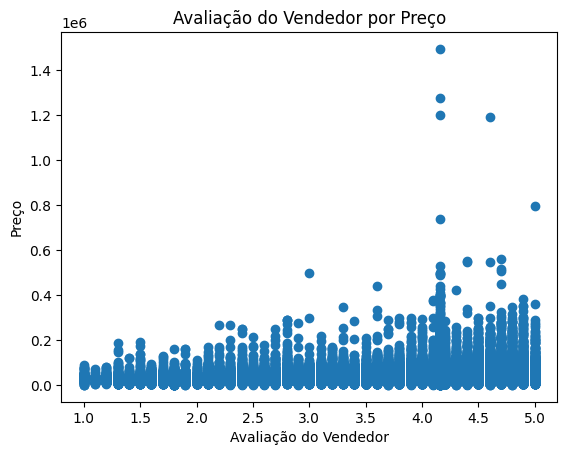

In [1506]:
plt.scatter(cars_df['seller_rating'], cars_df['price'])
plt.title('Avaliação do Vendedor por Preço')
plt.ylabel('Preço')
plt.xlabel('Avaliação do Vendedor')
plt.show()

In [1508]:
cars_df

,manufacturer,year,mileage,accidents_or_damage,seller_rating,driver_rating,driver_reviews_num,price_drop,price,model,...,cylinders,turbo,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,one_owner,personal_use_only
456056,Land Rover,2018,33585.00,0.00,4.10,4.00,45.00,500.00,53950.00,Range Rover Sport HSE Dynamic,...,16.00,0.00,Automatic,4WD,Gasoline,20.00,Black,Black,1.00,0.00
563956,Nissan,2017,63009.00,0.00,2.30,4.70,78.00,NaN,27885.00,Armada SL,...,32.00,0.00,Automatic,RWD,Gasoline,16.50,Black,Beige,0.00,1.00
724184,Toyota,2018,51316.00,0.00,4.40,4.80,199.00,1000.00,46995.00,Tundra 1794,...,16.00,0.00,Automatic,4WD,Gasoline,15.00,Silver,Black,0.00,1.00
706657,Toyota,2015,89444.00,0.00,4.70,4.70,74.00,482.00,17987.00,Avalon XLE,...,24.00,0.00,Automatic,FWD,Gasoline,26.00,Gray,Gray,1.00,1.00
551197,Mercedes-Benz,2023,2191.00,0.00,4.50,NaN,0.00,5969.00,96648.00,GLS 450 4MATIC,...,24.00,1.00,Automatic,AWD,Gasoline,24.91,Other,Brown,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340527,Hyundai,2017,52900.00,0.00,4.80,4.70,640.00,NaN,16995.00,Elantra SE,...,16.00,0.00,Automatic,FWD,Gasoline,33.50,Blue,Gray,0.00,0.00
618501,RAM,2015,45195.00,0.00,4.60,4.10,5.00,NaN,54870.00,ProMaster 1500 Low Roof,...,16.00,1.00,Automatic,FWD,Diesel,25.01,White,Gray,0.00,1.00
673837,Toyota,2013,160000.00,0.00,3.40,4.70,140.00,NaN,13991.00,Highlander,...,24.00,0.00,Automatic,AWD,Gasoline,19.50,White,Beige,1.00,1.00
291906,GMC,2016,102462.00,0.00,4.80,4.70,26.00,213.00,32777.00,Yukon XL Denali,...,16.00,0.00,Automatic,RWD,Gasoline,18.50,Black,Black,0.00,1.00


## 2.17 Coluna ```driver_reviews_num```

In [1511]:
cars_df['driver_reviews_num'].value_counts()

driver_reviews_num
0.00      7920
2.00      5346
3.00      4182
4.00      3973
1.00      3483
          ... 
240.00      16
209.00      15
301.00      15
232.00      12
369.00       8
Name: count, Length: 369, dtype: int64

Parece haver uma relação entre o número de avaliações entre os carros e o preço pelo qual são vendidos. 

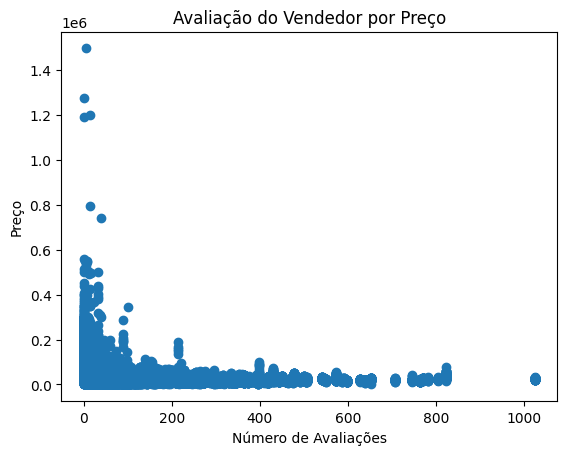

In [1512]:
plt.scatter(cars_df['driver_reviews_num'], cars_df['price'])
plt.title('Avaliação do Vendedor por Preço')
plt.ylabel('Preço')
plt.xlabel('Número de Avaliações')
plt.show()

Parece que quanto menos avaliações, maiores as chances do carro ser vendido a um preço mais alto. Isso pode se dever a alguns fatores, dentre eles:
* carros menos avaliados geralmente são mais novos, o que os torna mais caros; e
* carros menos avaliados podem ser mais raros, e portanto, mais caros.

## 2.18 Coluna ```driver_rating```

In [1517]:
cars_df['driver_rating'].value_counts()

driver_rating
4.70    39734
4.80    39111
4.60    29441
4.50    18763
4.90    15967
4.40    10762
5.00     7738
4.30     7200
4.20     4226
4.10     3349
4.00     1688
3.80     1304
3.90      941
3.70      686
3.60      395
3.40      331
3.50      225
2.80      212
2.90      155
3.00       92
2.60       83
1.00       72
3.20       43
3.30       30
2.50       22
2.20        8
2.70        7
3.10        4
2.00        3
2.10        3
1.70        2
2.30        2
1.50        1
Name: count, dtype: int64

In [1519]:
cars_df['driver_rating'].isna().sum()

7920

Vamos avaliar como podemos substituir os valores ```NaN```.

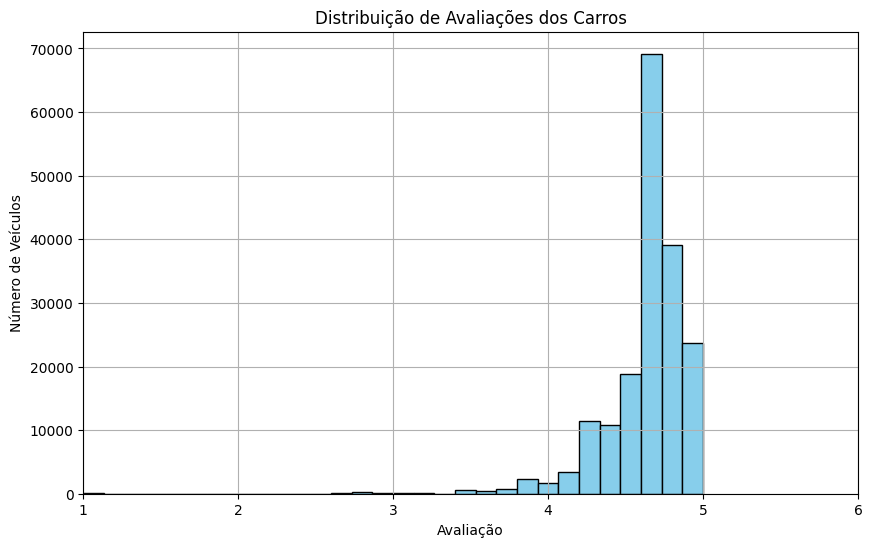

In [1526]:
driver_rat_values = cars_df['driver_rating']  

plt.figure(figsize=(10, 6))
plt.hist(driver_rat_values, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição de Avaliações dos Carros')
plt.xlabel('Avaliação')
plt.ylabel('Número de Veículos')
plt.grid(True)
plt.xlim(1, 6)
plt.show()

In [1532]:
# Vamos calcular o Coeficiente de Assimetria
frequencias = cars_df['driver_rating'].value_counts().sort_index()

media = np.average(frequencias.index, weights=frequencias)

soma_numerador = sum((xi - media) ** 3 * freq for xi, freq in frequencias.items())
soma_denominador = sum((xi - media) ** 2 * freq for xi, freq in frequencias.items())

# Calculando o coeficiente de assimetria
assimetria = soma_numerador / (soma_denominador ** (3 / 2))

print("Coeficiente de assimetria:", assimetria)

Coeficiente de assimetria: -0.006673340391199716


O plot e o coeficiente indicam que a distribuição é normal, assim, a substituição dos ```NaN``` pode ser feita pela média ou mediana. Vamos prosseguir com a média.

In [1533]:
cars_df['driver_rating'].fillna(cars_df['driver_rating'].mean(), inplace=True)

In [1534]:
cars_df['driver_rating'].isna().sum()

0

## 2.19 Coluna ```price_drop```

Conforme recomendação nas mentorias, a coluna ```price_drop``` deverá ser ignorada. Isso porque trata-se de um vazamento de dados ou data leakage.

In [1513]:
cars_df.drop('price_drop', axis=1, inplace=True)

## 3. Análise Exploratória dos Dados – pós-limpeza

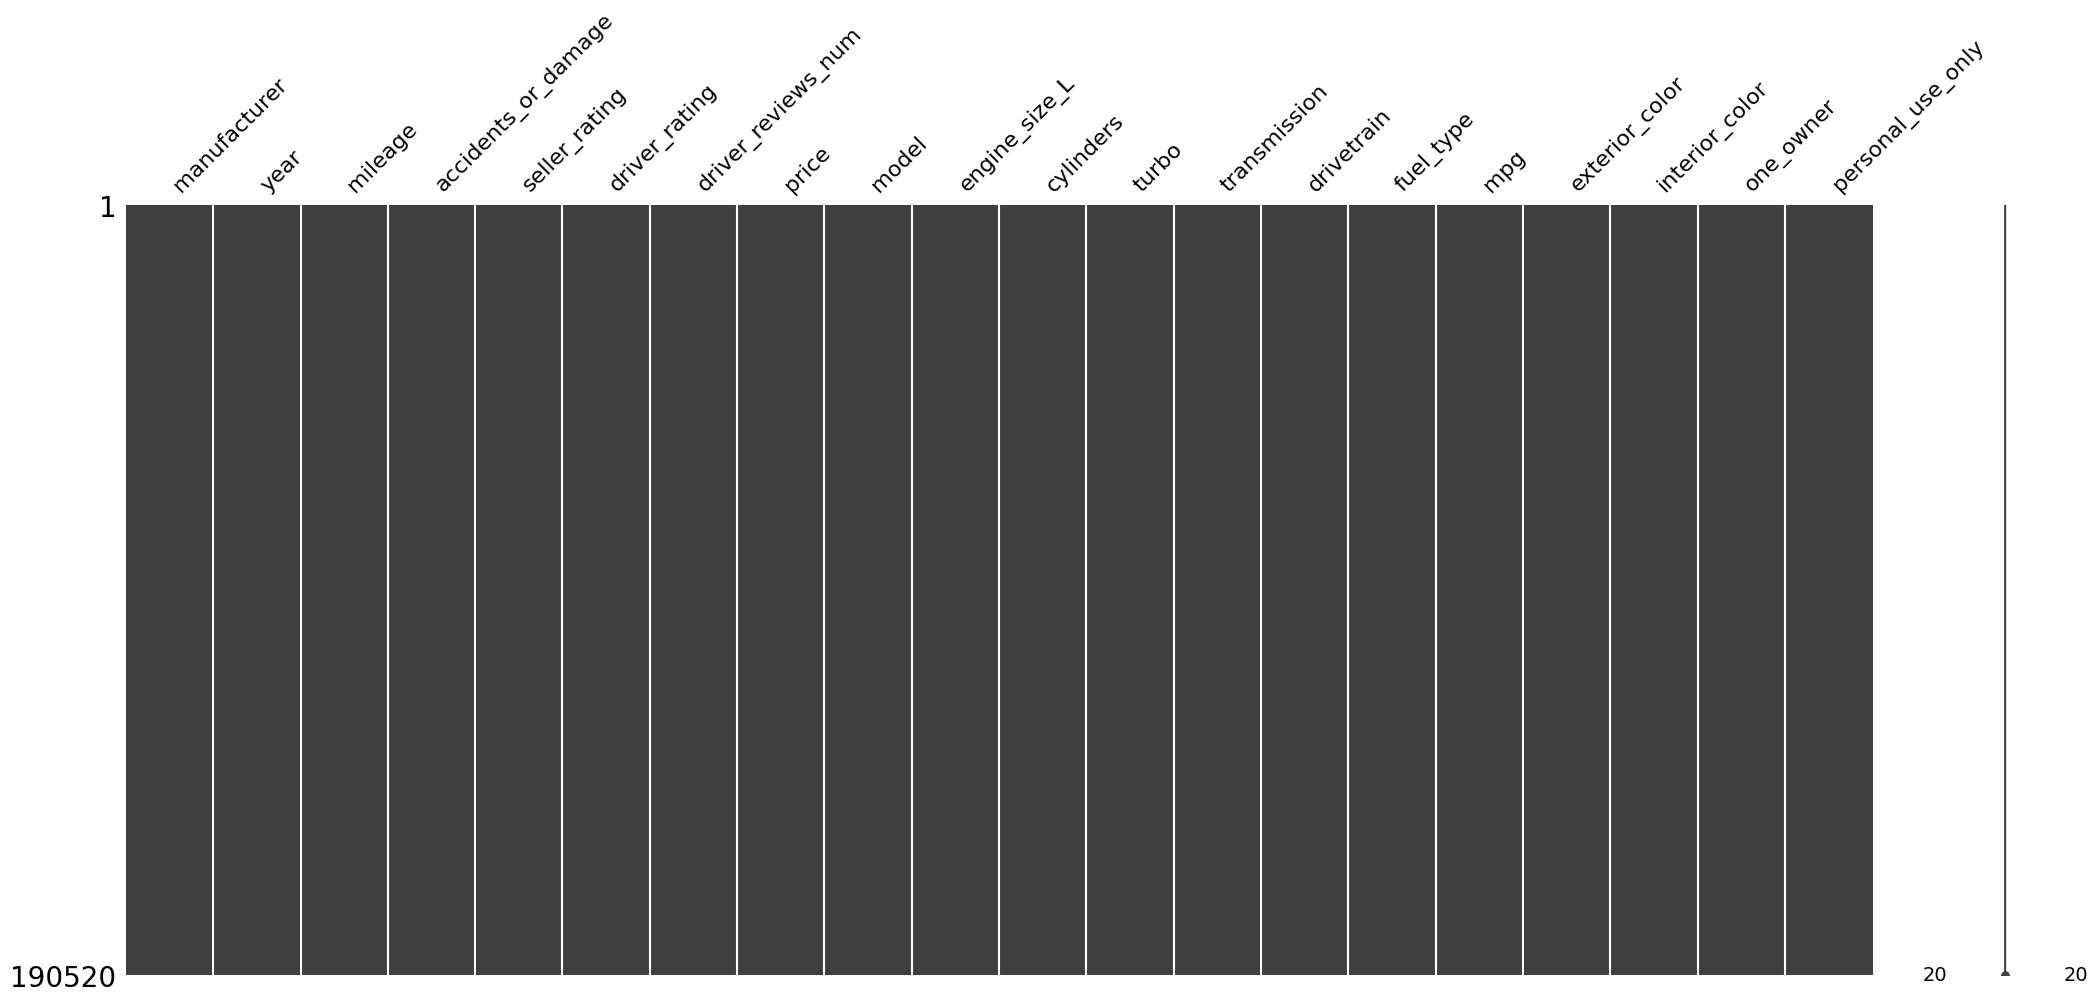

In [1536]:
# verificando se ainda há dados faltantes
import missingno as msno
msno.matrix(cars_df)
plt.show()

## 1. Variáveis Categóricas e Numéricas

Importante ressaltarmos a diferença entre ambas.

* **Variáveis categóricas** – são aquelas que representam qualidade. Nesse estudo, serão consideradas categóricas as variáveis:
    * manufacturer, accidents_or_damage, model, turbo, transmission, drivetrain, fuel_type, exterior_color, interior_color, one_owner e personal_use_only.

* **Variáveis numéricas** - são as que representam quantidade. Serão assim consideradas as variáveis:
    * year, mileage, seller_rating, driver_rating, driver_reviews_num, price, engine_size_L, cylinders e mpg.

Importante ressaltar que ano será considerado uma variável numérica dado o contexto da análise. O que será considerado para fins de análise é o envelhecimento do carro, ou seja, um dado numérico. Seria diferente, caso o ano fosse usado para agrupar os carros, ou seja, para colocá-los em categorias, então seria considerado uma variável categórica.


Vamos calcular a correlação de Pearson entre as variáveis numéricas.


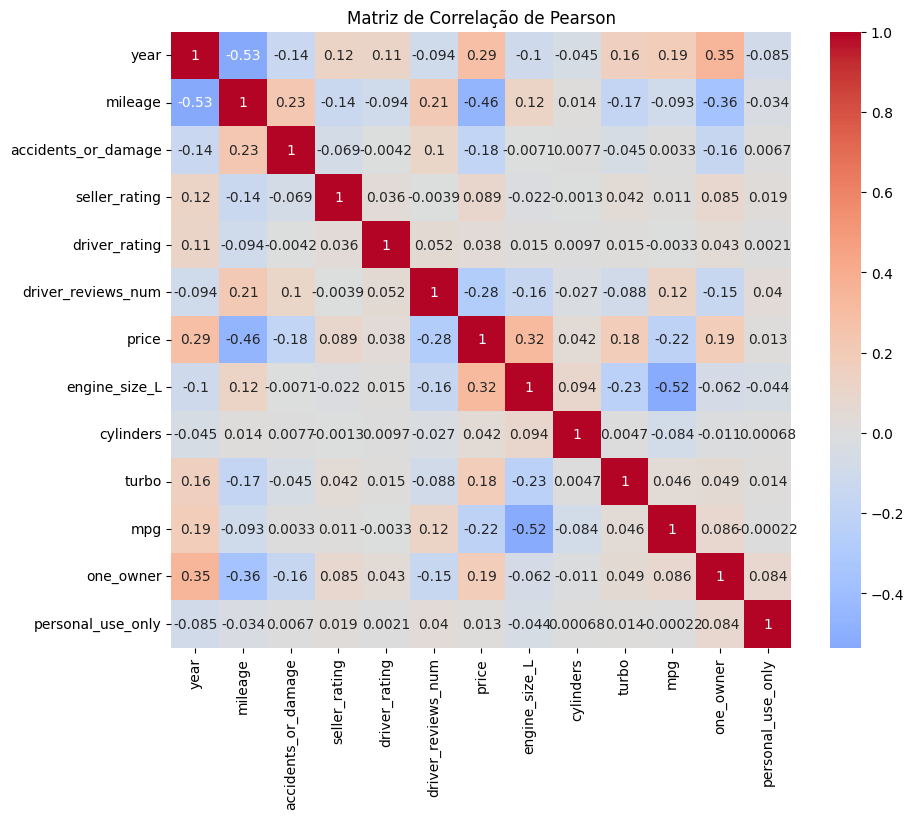

In [1550]:
numeric_df = cars_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação de Pearson')
plt.show()

Interessante notar algumas relações. 

Relações positivas em relação a price:
* engine_size_L (tamanho do motor) (0.32)
* ano da venda (0.29)
* one_owner (carro de único dono) (0.19)
* há turbo (0.18)

Relações negativas em relação a price:
* mileage (milhagem) (-0.46)
* driver_reviews_num (número de avaliações do carro) (-0.28)
* mpg (milhas por galão) (-0.22)
* accidents_or_damage (-0.18)

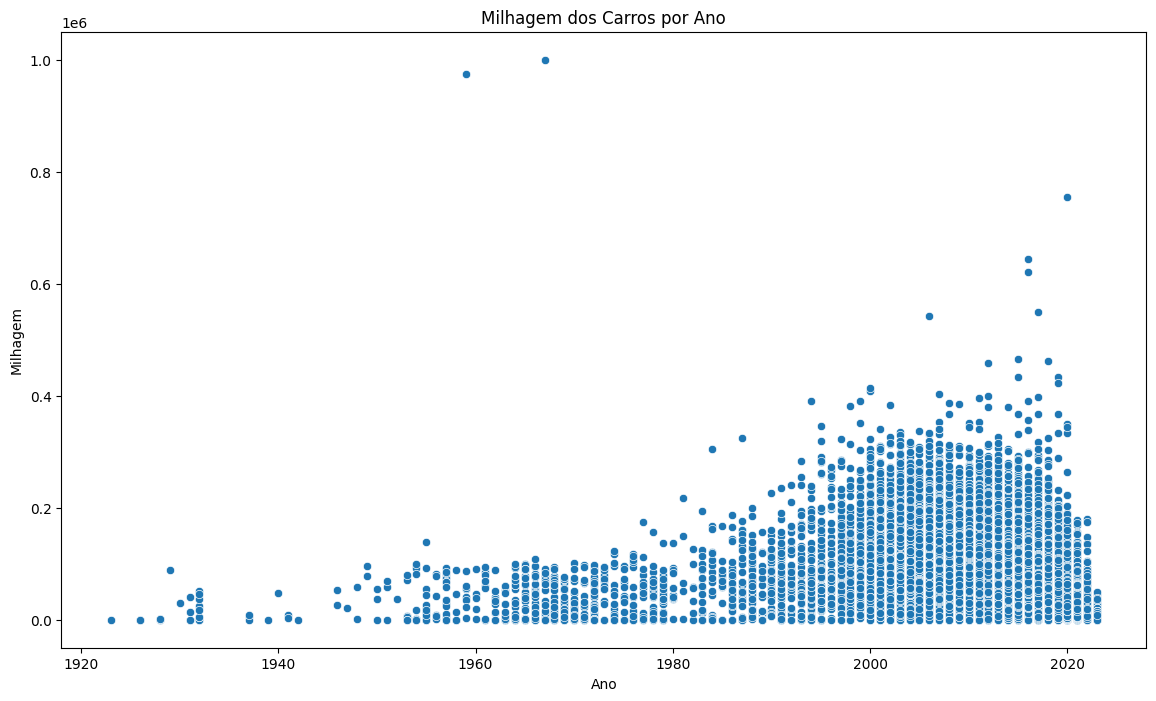

In [1548]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='year', y='mileage', data=cars_df)
plt.xlabel('Ano')
plt.ylabel('Milhagem')
plt.title('Milhagem dos Carros por Ano')
plt.show()